<a href="https://colab.research.google.com/github/Anoshawott/cinnabar-island/blob/master/Data_Analysis_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Predictions - Investigating Measures of Health and Economic Freedom as Determinants in Socioeconomic Performance of the G20 Nations
## Anosh.S
Time for the interesting stuff!!!
Critical to substantiating analysis is the inclusion of various graphical elements (charts and tables). This section will detail the methodologies involved to produce them and is primarily intended for providing insights to individuals with an interest in IT approaches to data analysis. It is important to note that all data processing and chart creations were completed within the Google Colab python notebook environment. Thus, certain functions may refer specifically to its use exclusive to the environment only.

Loading the datasets was achieved through direct sourcing from Google Drive using PyDrive. This involves authorising google drive access to retrieve the clean datasets from where they had been stored for access.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Having authorised access from the Google Drive the datasets were then loaded to the Google Colab environment. Links from the files located on the Google drive were used for direct access and use. The relevant packages were imported also.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
sns.set_style('darkgrid')

In [0]:
link = 'https://drive.google.com/open?id=18dTY8lnkcUQLBVTF_gQ4wDSaxQpwU7uE'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('efw_cc_clean.csv')  

In [0]:
link = 'https://drive.google.com/open?id=1BFJGh4VKsnHWhCrrOJ3sZp7nhxWy4fHA'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GLOB-SES_clean.csv')  

In [0]:
link = 'https://drive.google.com/open?id=19Rxhhpejbd_Apzzi-Mfj-3W7X-Esl-IC'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Life Expectancy Data_clean.csv')  

The loaded datasets were then converted to pandas dataframes for manipulation and construction of the charts.

In [0]:
efw = pd.read_csv('efw_cc_clean.csv')
gs = pd.read_csv('GLOB-SES_clean.csv')
le = pd.read_csv('Life Expectancy Data_clean.csv')

## General Charts

Creating individual dataframes for only countries in the G20.

In [0]:
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Since the primary focus of this research report revolved around an investigation for understanding a variety of measures relating to G20 nations these had to be filtered from each of the dataframes . While this was addressed these filtered data frames were then concatenated to form a single dataframe that contained these G20 nations. This process was repeated on the gs and le data frames.

In [0]:
#efw dataset
arg1 = efw.loc[efw.countries == 'Argentina']
aus1 = efw.loc[efw.countries == 'Australia']
brz1 = efw.loc[efw.countries == 'Brazil']
can1 = efw.loc[efw.countries == 'Canada']
Chn1 = efw.loc[efw.countries == 'China']
Grm1 = efw.loc[efw.countries == 'Germany']
Frn1 = efw.loc[efw.countries == 'France']
Ind1 = efw.loc[efw.countries == 'India']
Ina1 = efw.loc[efw.countries == 'Indonesia']
Ity1 = efw.loc[efw.countries == 'Italy']
Jpn1 = efw.loc[efw.countries == 'Japan']
Mex1 = efw.loc[efw.countries == 'Mexico']
Rus1 = efw.loc[efw.countries == 'Russia']
SA1 = efw.loc[efw.countries == 'Saudi Arabia']
Saf1 = efw.loc[efw.countries == 'South Africa']
SK1 = efw.loc[efw.countries == 'Korea, South']
Tky1 = efw.loc[efw.countries == 'Turkey']
UK1 = efw.loc[efw.countries == 'United Kingdom']
US1 = efw.loc[efw.countries == 'United States']
new_df1_lst = [arg1, aus1, brz1, can1, Chn1, Grm1, Frn1, Ind1, Ina1, Ity1, Jpn1, Mex1, Rus1, SA1, Saf1, SK1, Tky1, UK1, US1]
new_df1 = pd.concat([arg1, aus1, brz1, can1, Chn1, Grm1, Frn1, Ind1, Ina1, Ity1, Jpn1, Mex1, Rus1, SA1, Saf1, SK1, Tky1, UK1, US1])

Correlation Heatmap of Section 1 Measures

(4.0, 0.0)

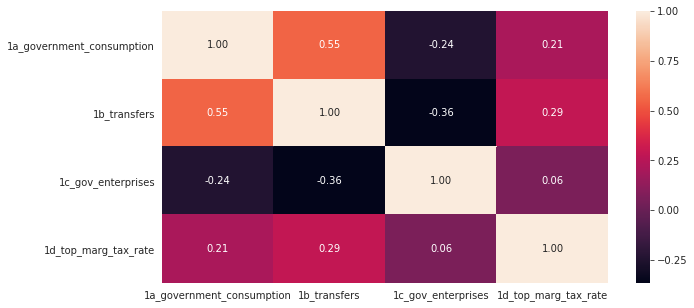

In [0]:
#fig,ax = plt.subplots(2, 1, figsize = (16,8))

#Plotting graph
plt.figure(figsize = (10, 5))
sns.heatmap(new_df1[['1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate']].corr(), annot = True, fmt = '.2f')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

Timeseries Comparison of Section 1 Indicators

In [0]:
#df.name.unique()   efw.loc[efw.countries == 'Mexico']

def efw_multi_comp1(dataf):
  country = str(dataf.countries.unique())
  plt.figure(figsize = (30, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 4, num)
  
      # plot every groups, but discrete
      for v in dataf[['1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,10)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return


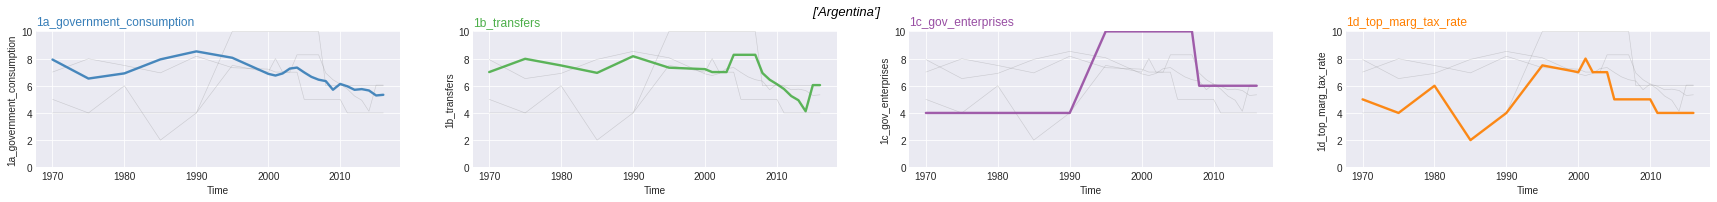

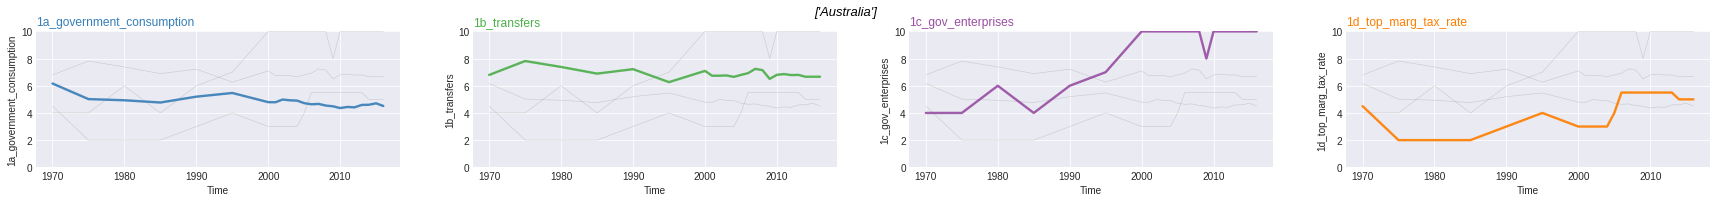

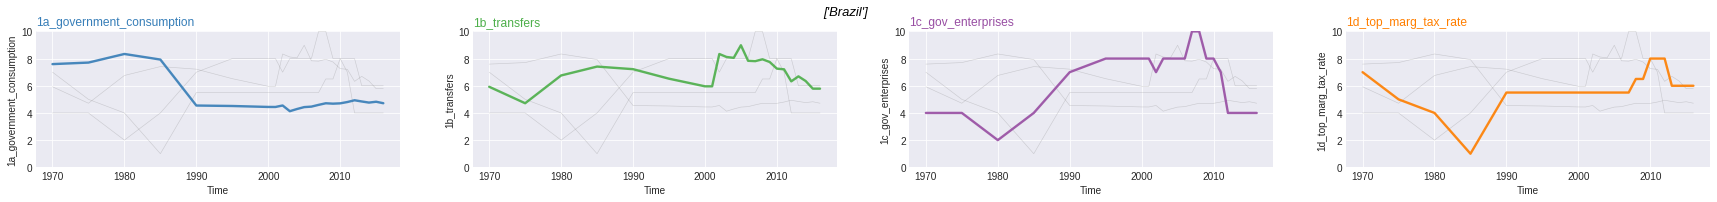

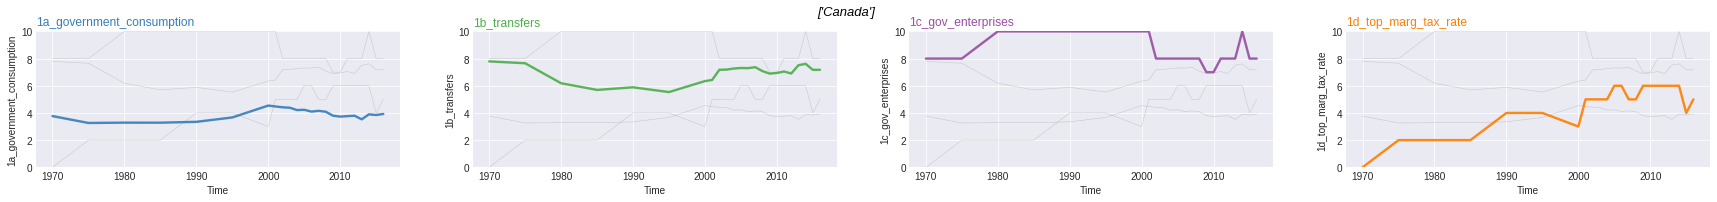

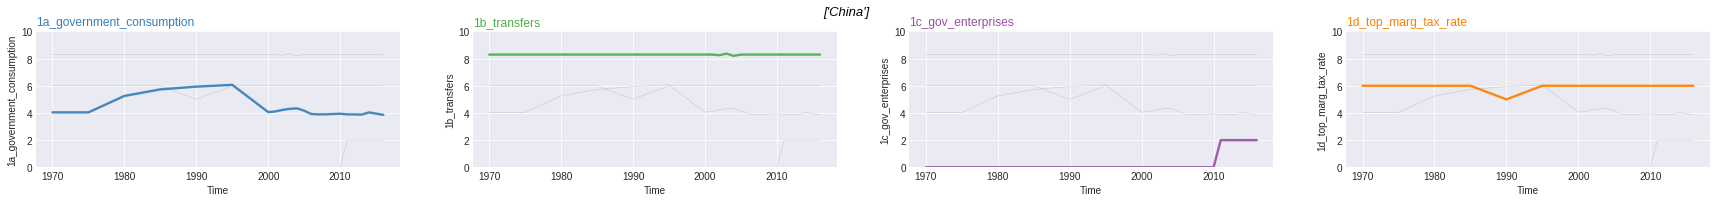

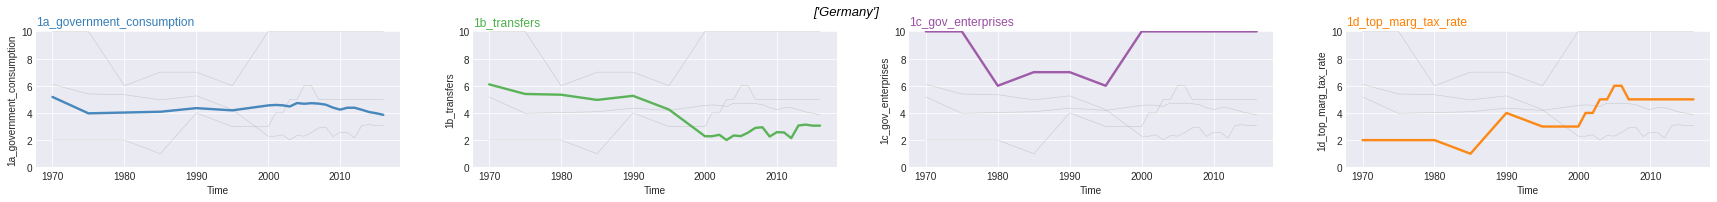

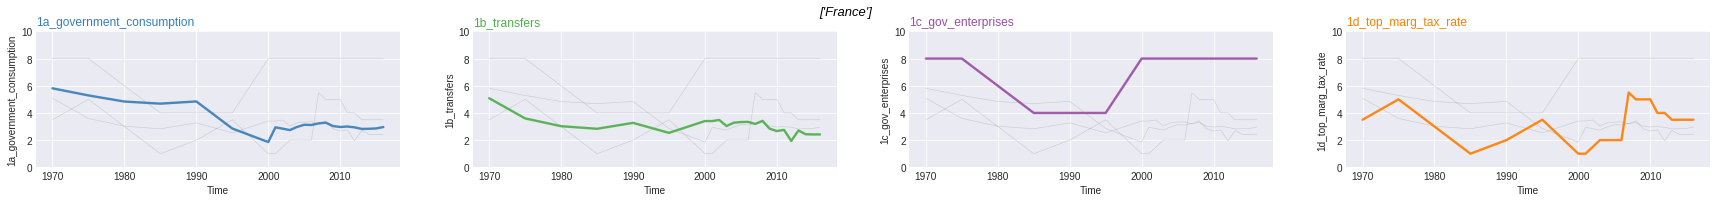

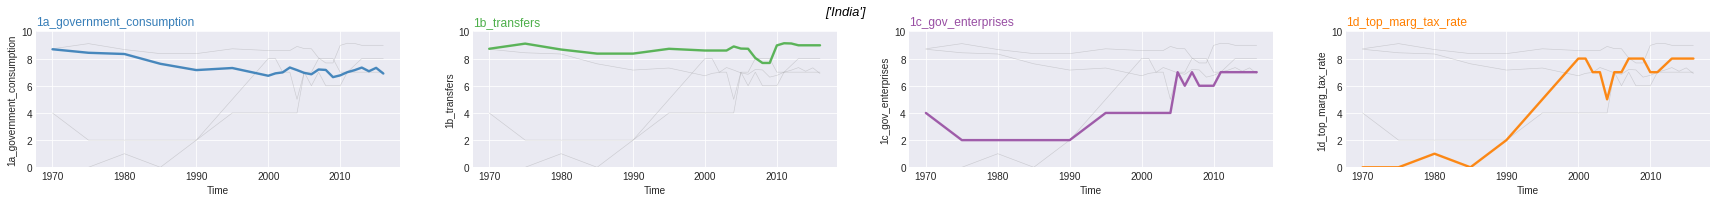

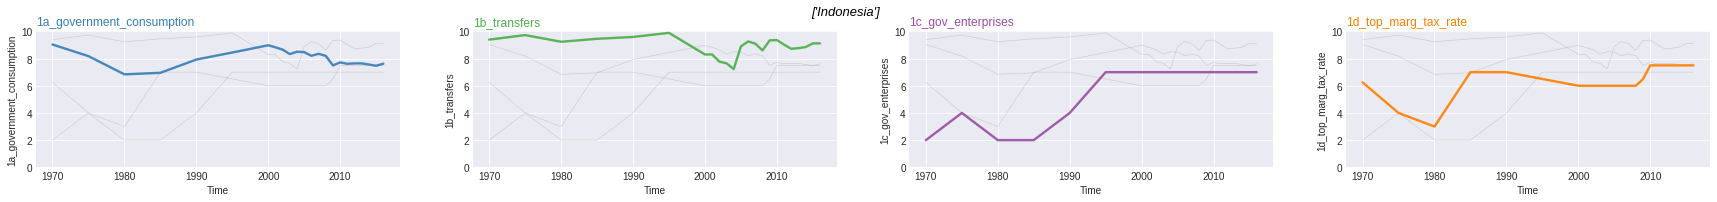

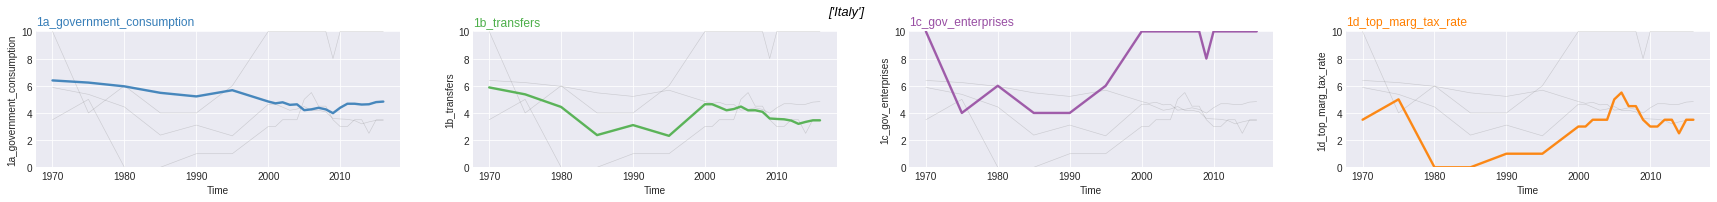

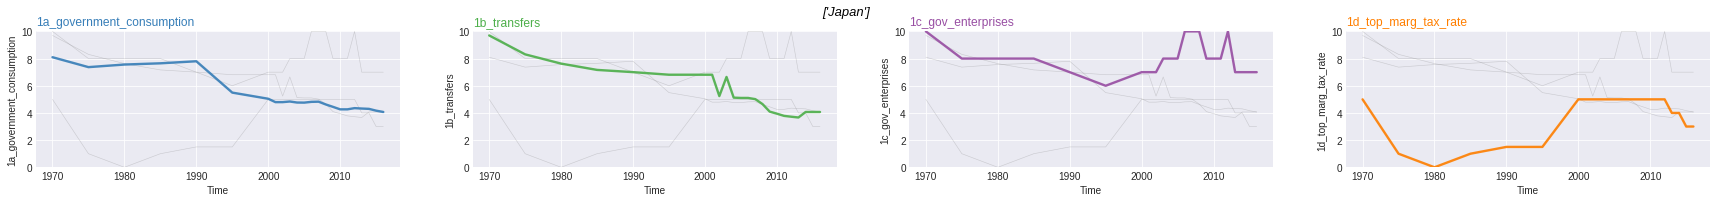

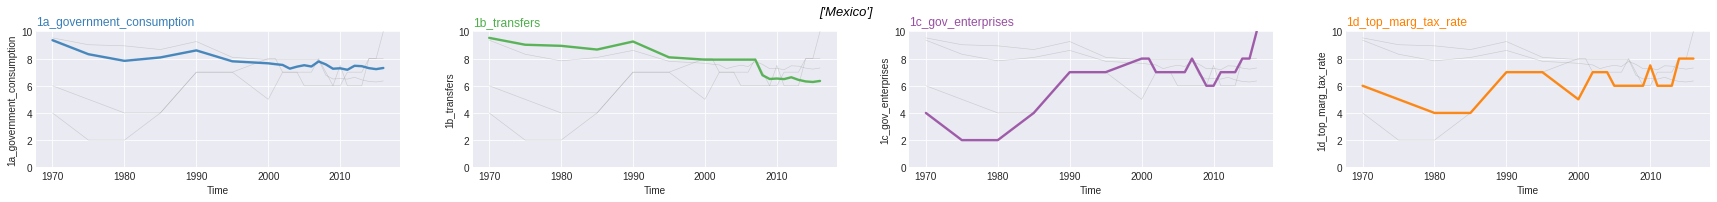

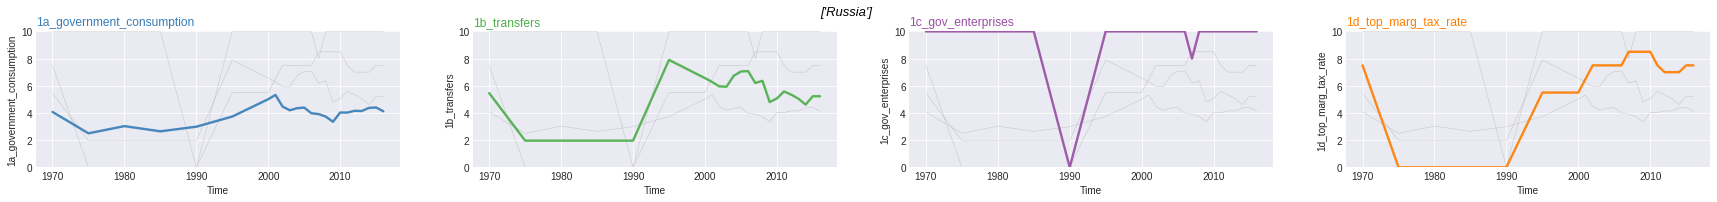

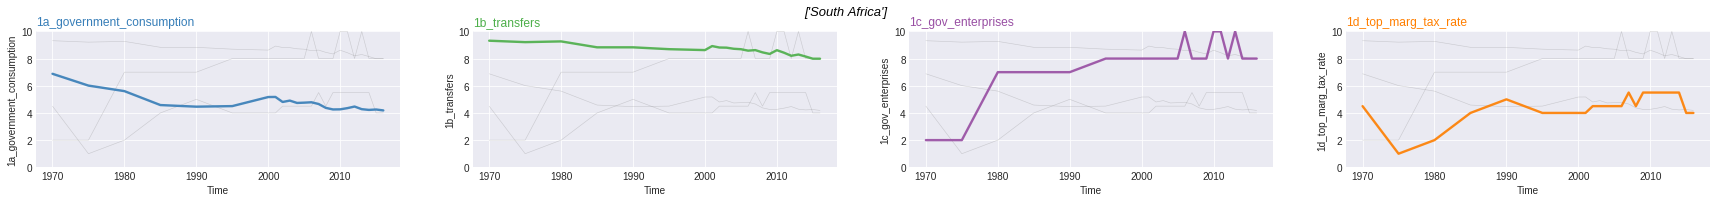

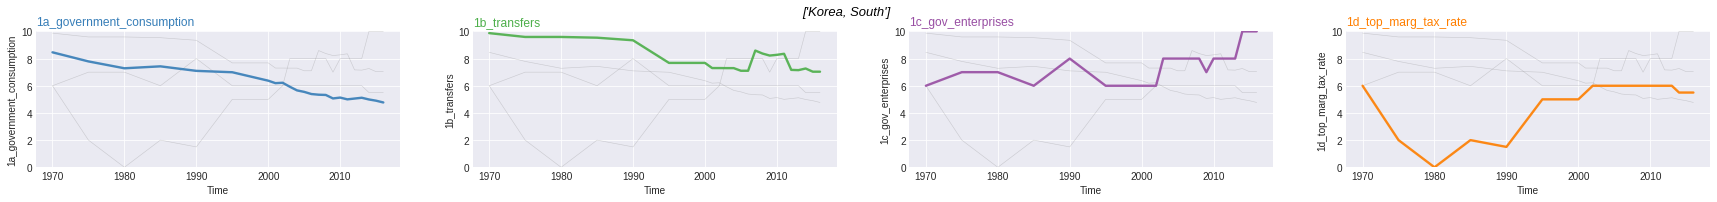

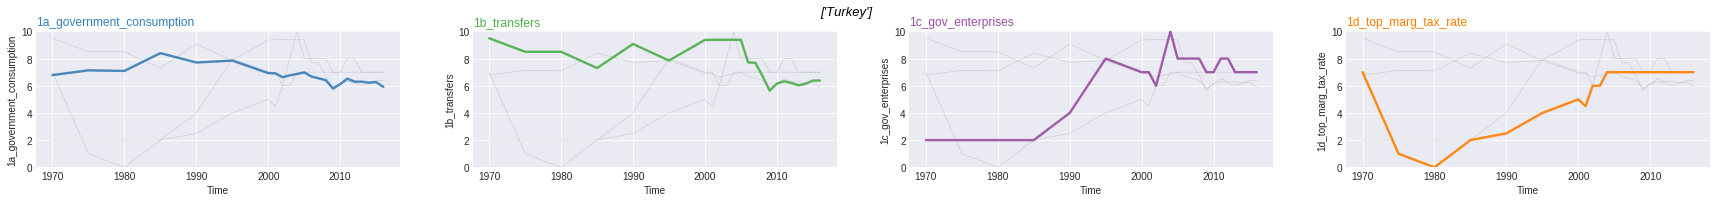

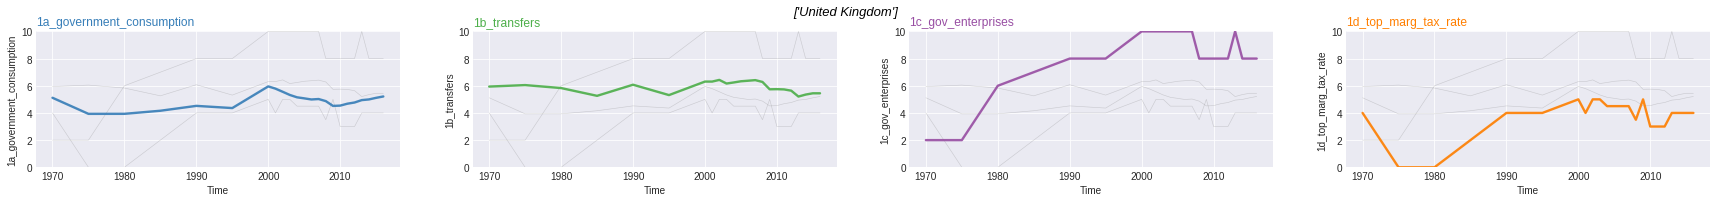

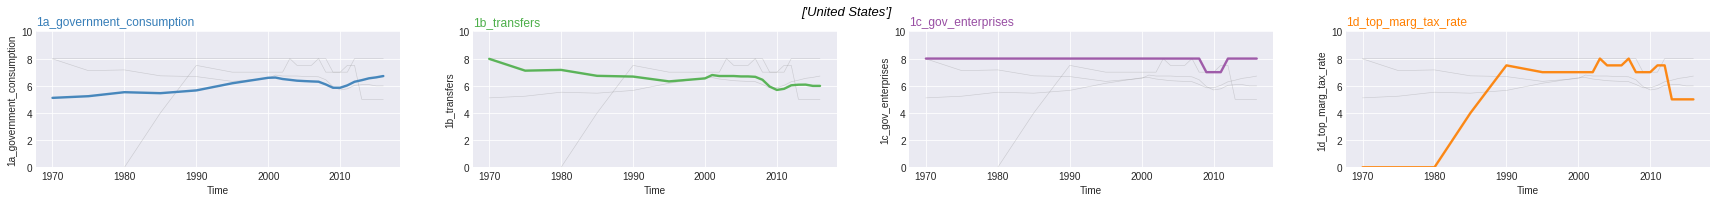

In [0]:
for i in new_df1_lst:
  if not i.empty:
    efw_multi_comp1(i)

Correlation Heatmap of Section 4 Measures

(4.0, 0.0)

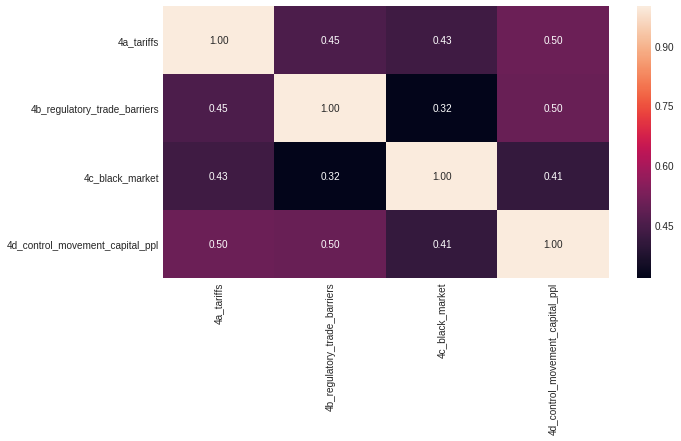

In [0]:
#Plotting graph
plt.figure(figsize = (10, 5))
sns.heatmap(new_df1[['4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl']].corr(), annot = True, fmt = '.2f')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

Timeseries Comparison of Section 4 Indicators

In [0]:
def efw_multi_comp4(dataf):
  country = str(dataf.countries.unique())
  plt.figure(figsize = (30, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 4, num)
  
      # plot every groups, but discrete
      for v in dataf[['4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,10)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return


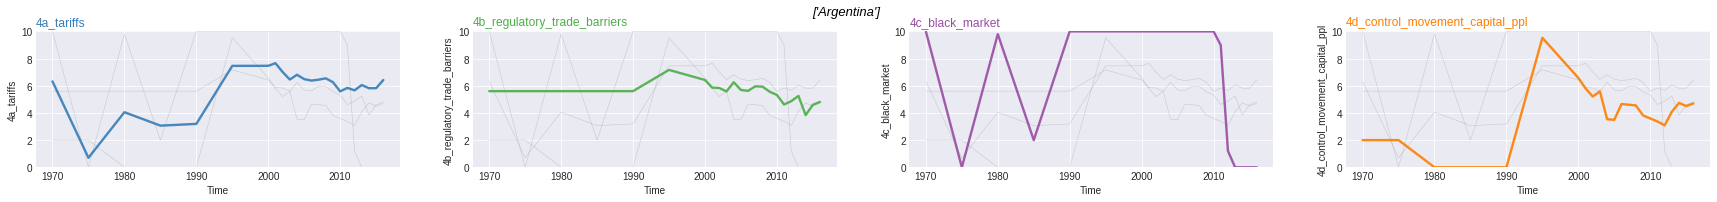

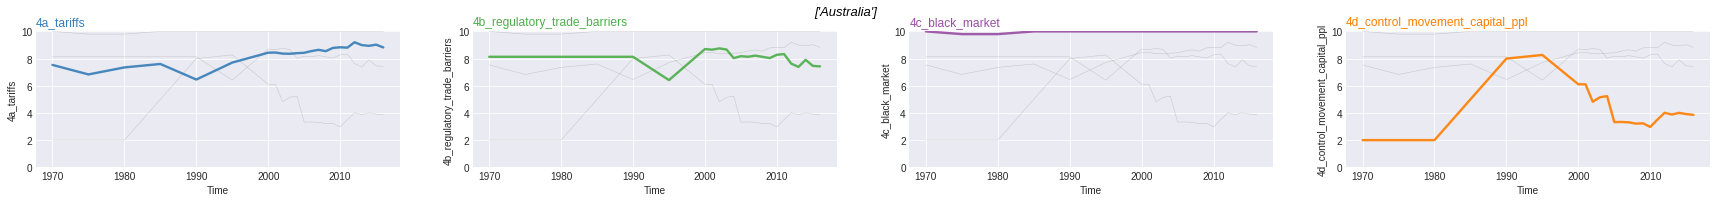

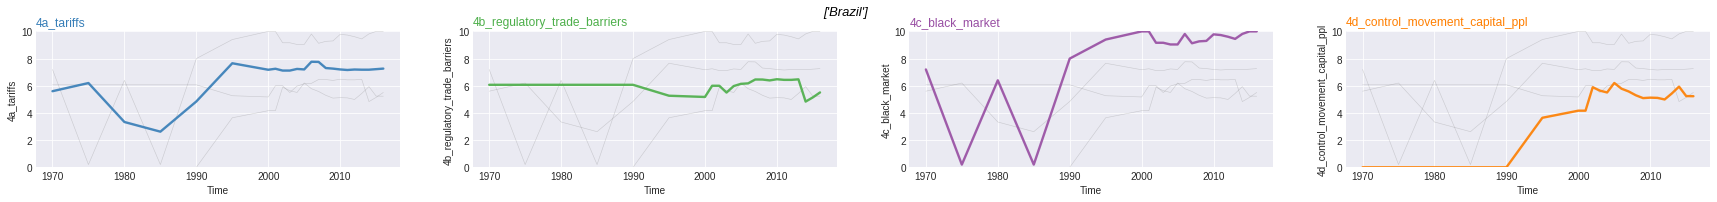

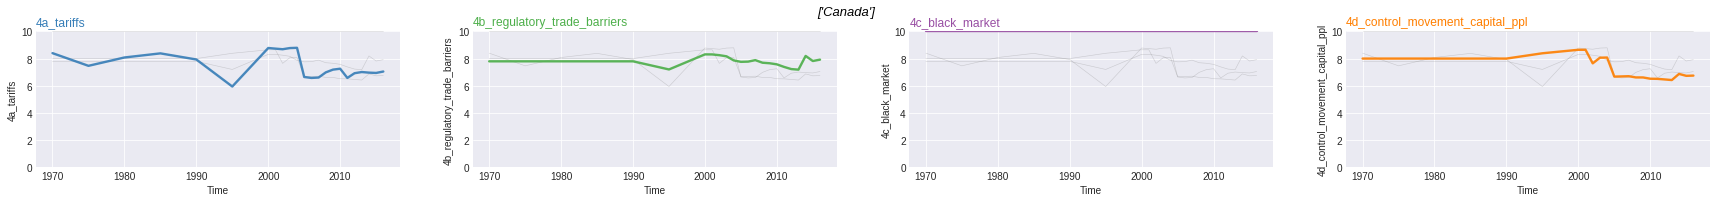

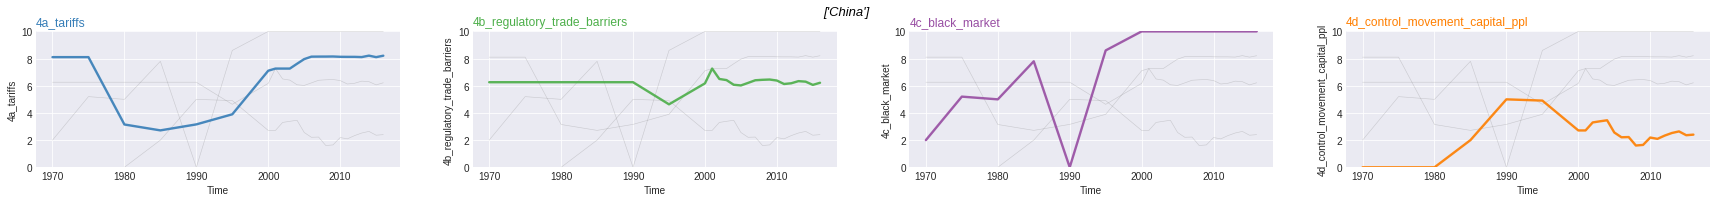

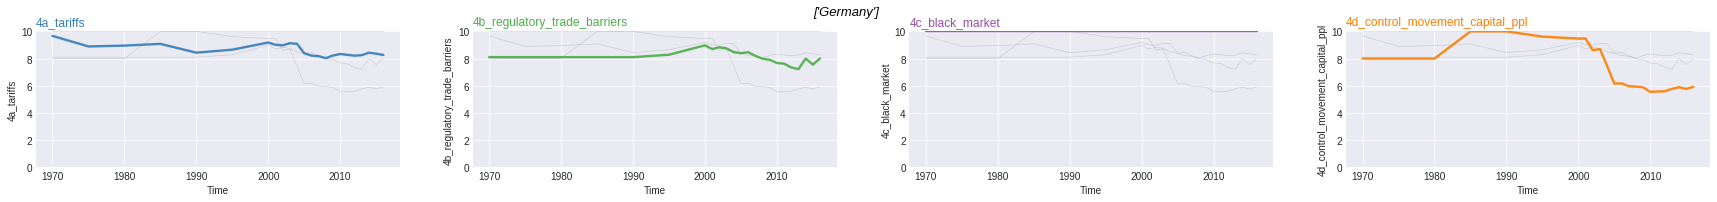

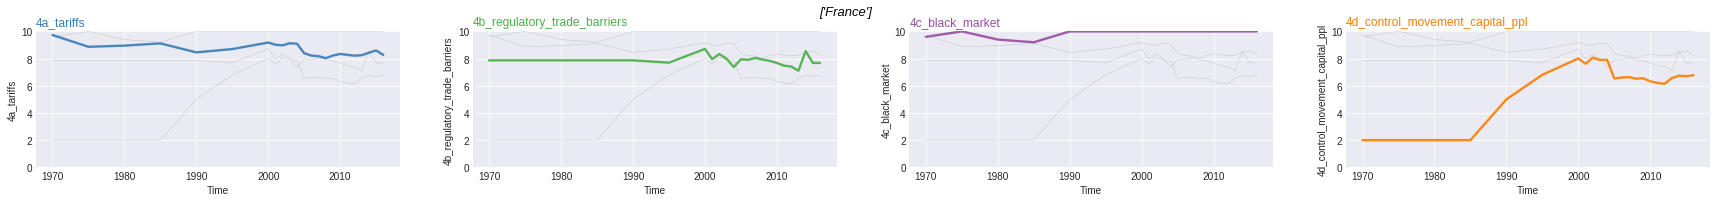

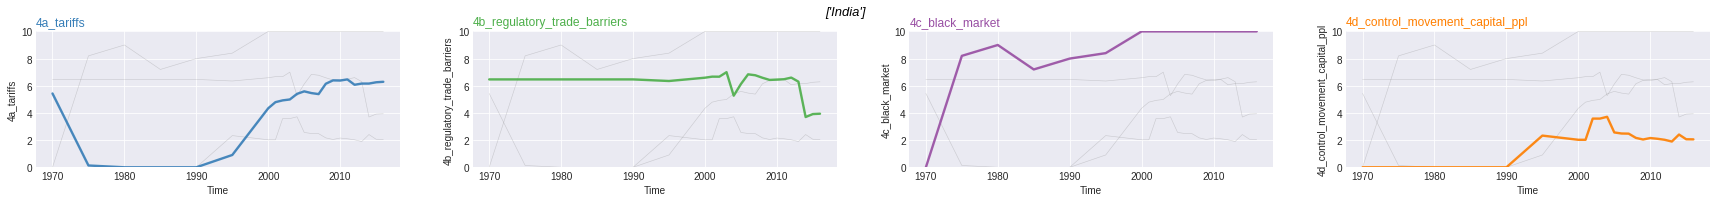

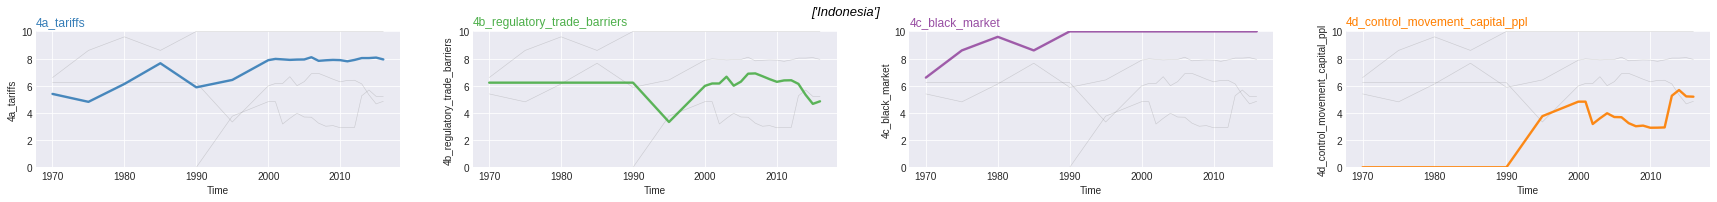

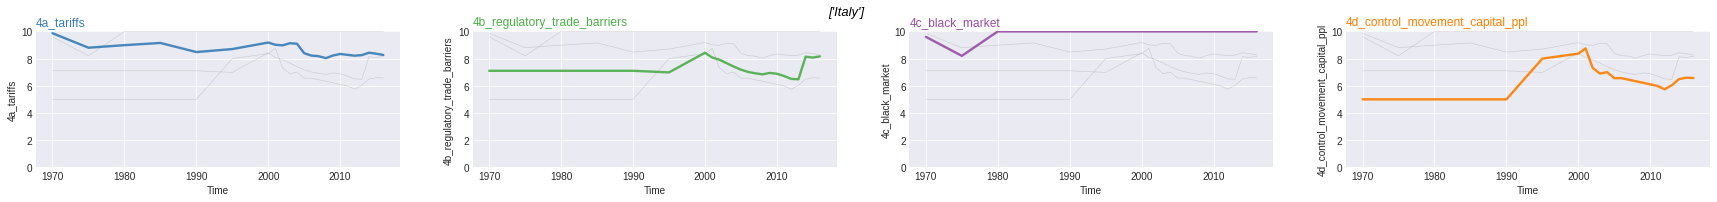

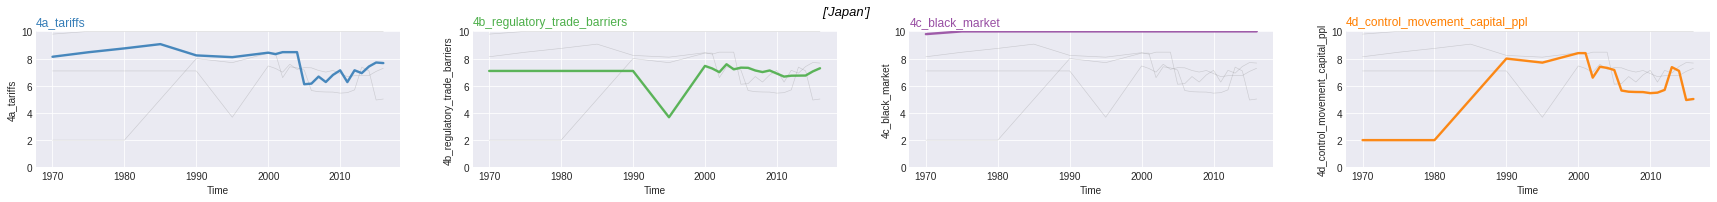

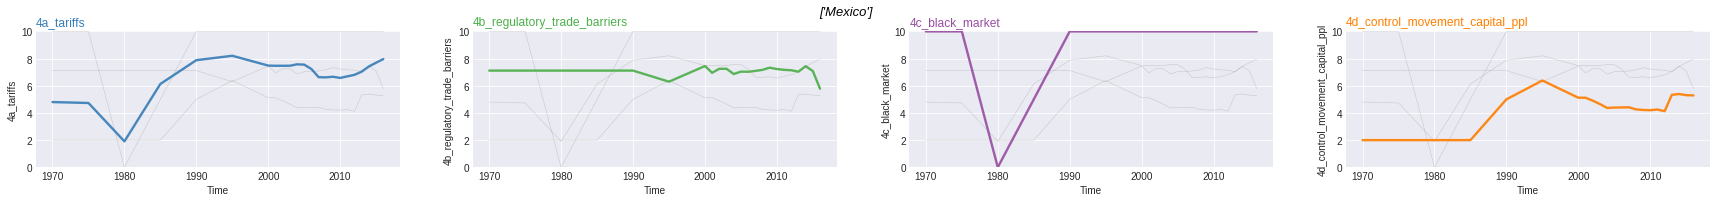

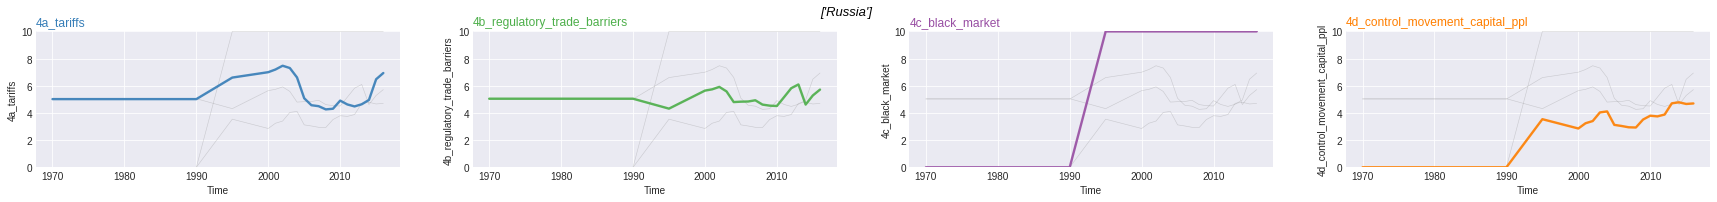

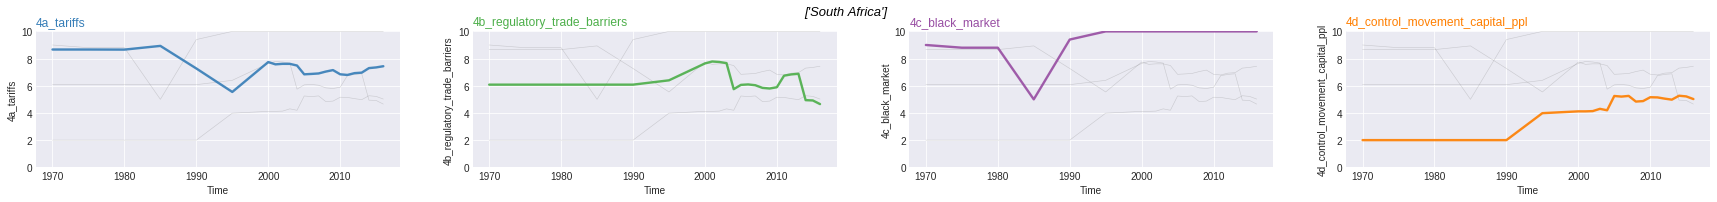

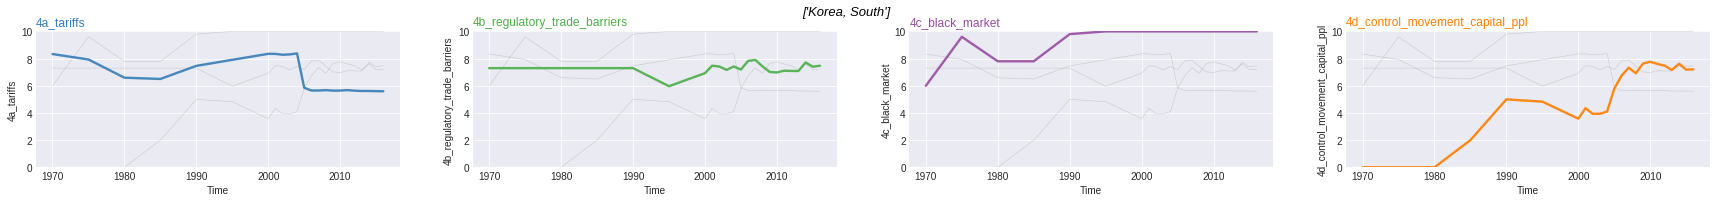

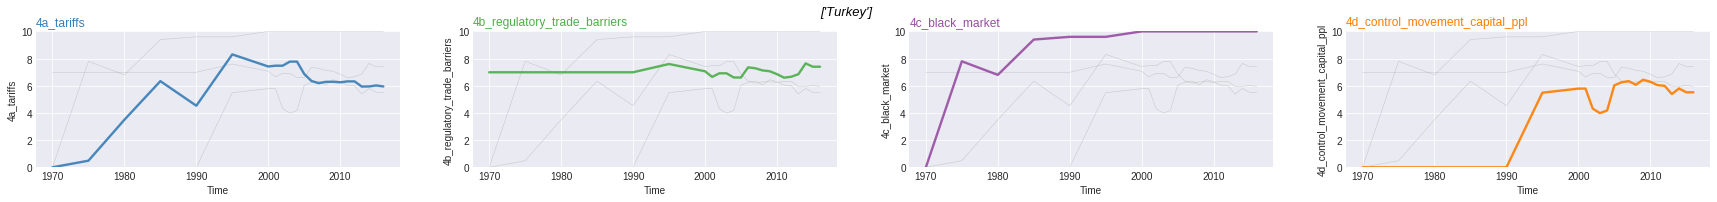

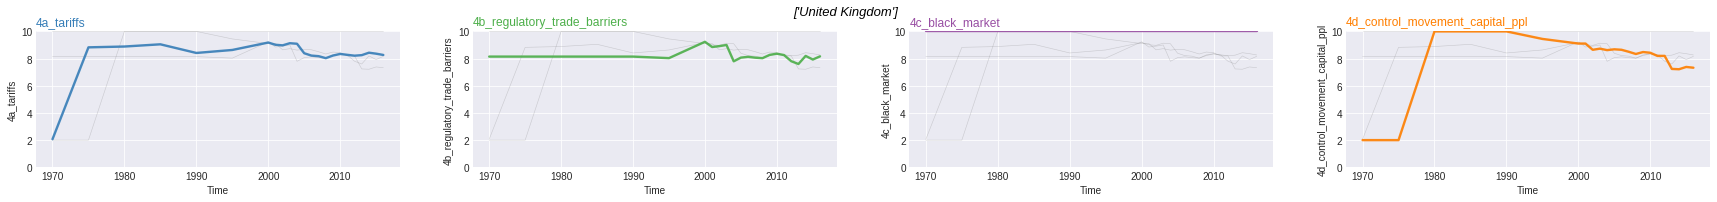

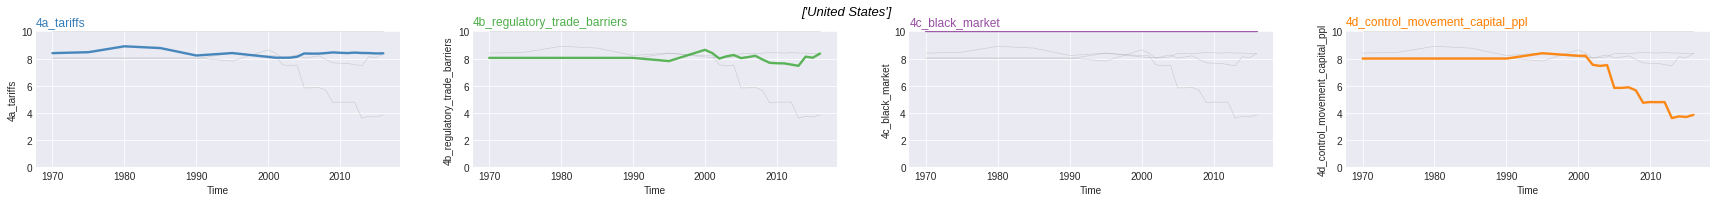

In [0]:
num = 0 
for i in new_df1_lst:
  num += 1
  if not i.empty:
    efw_multi_comp4(i)
    plt.savefig('trade_timeseries'+str(num)+'.png')

Correlation Heatmap of Section 3 Measures

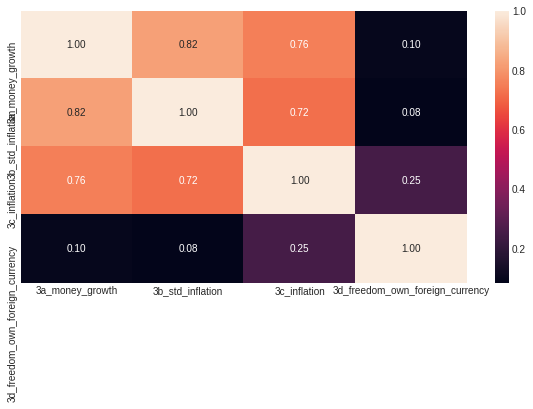

In [0]:
#Plotting graph
plt.figure(figsize = (10, 5))
sns.heatmap(new_df1[['3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency']].corr(), annot = True, fmt = '.2f')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('Correlation Heatmap of Section 3 Measures.png')

In [0]:
def efw_multi_comp3(dataf):
  country = str(dataf.countries.unique())
  plt.figure(figsize = (30, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 4, num)
  
      # plot every groups, but discrete
      for v in dataf[['3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,10)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return

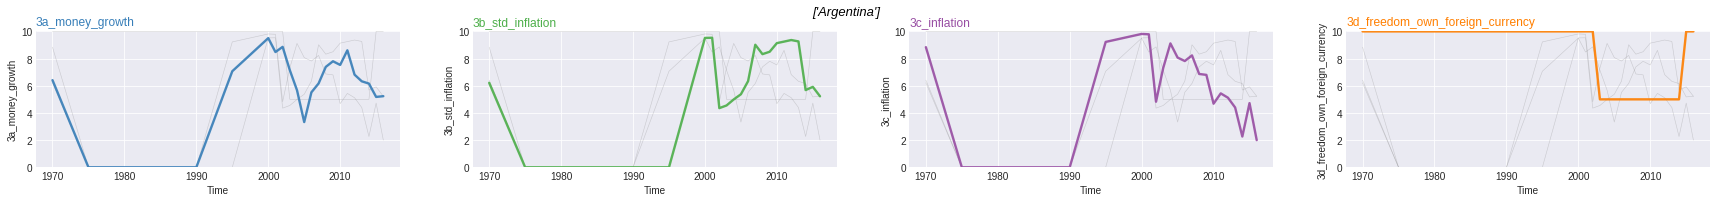

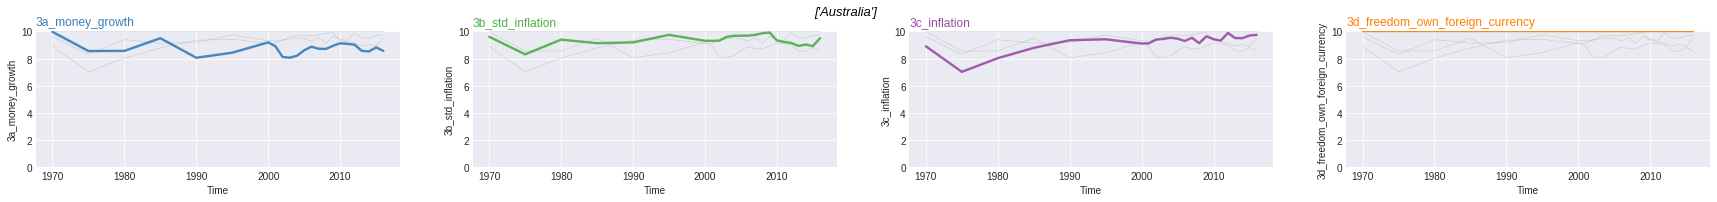

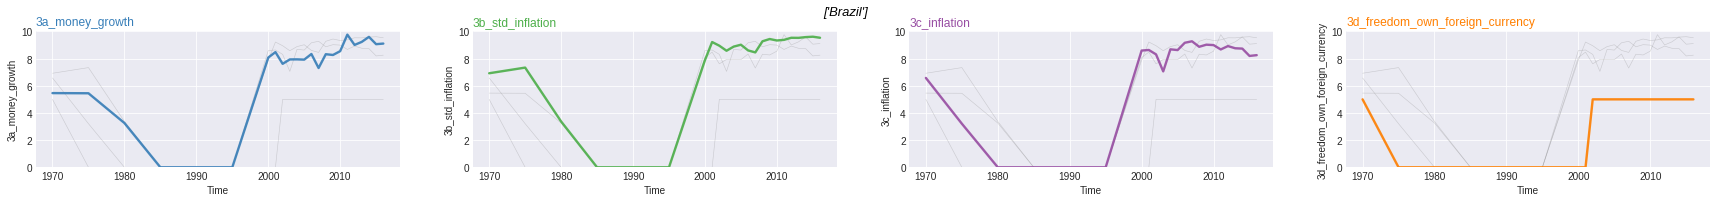

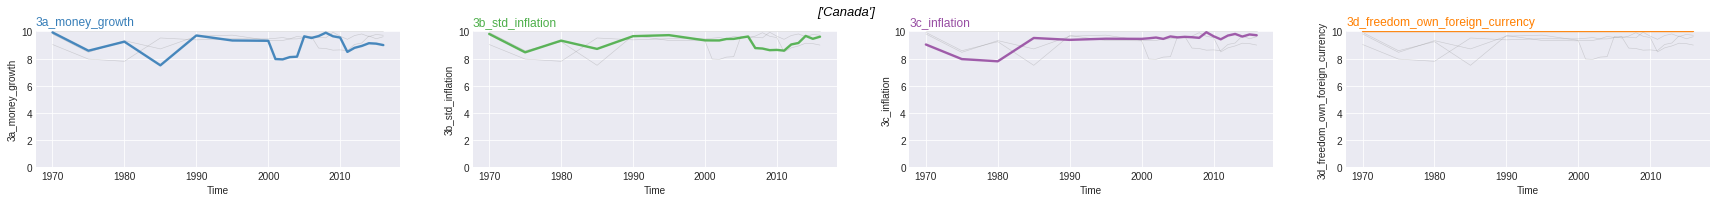

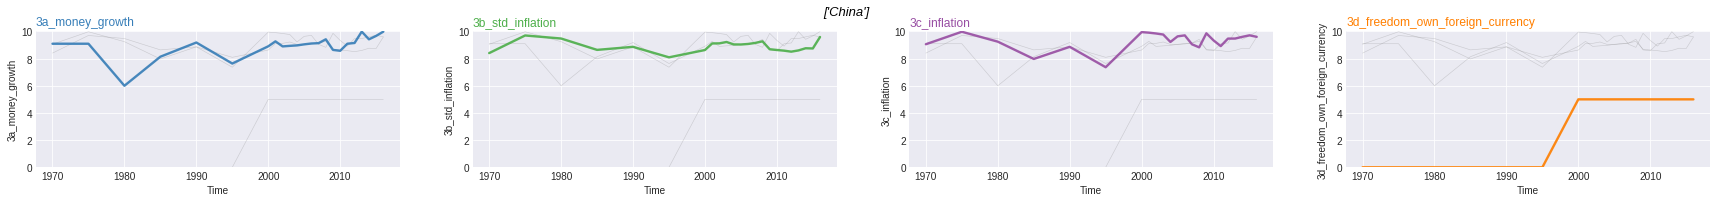

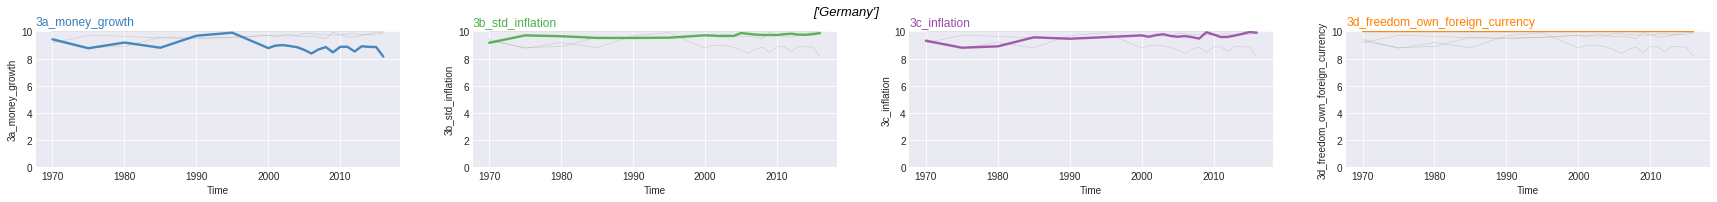

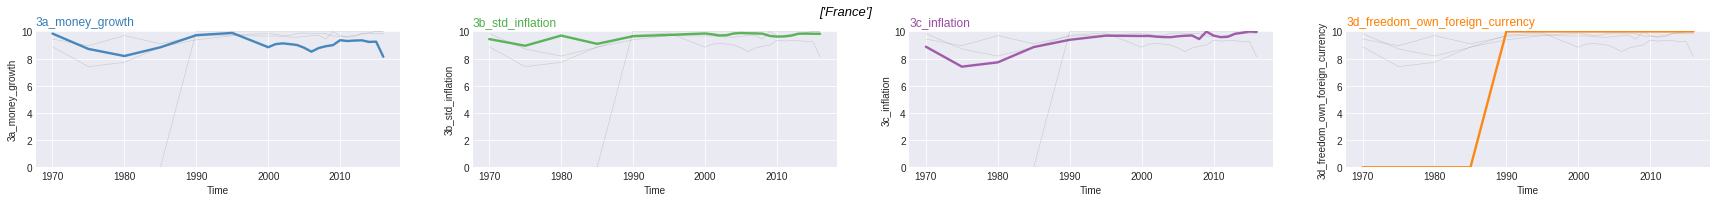

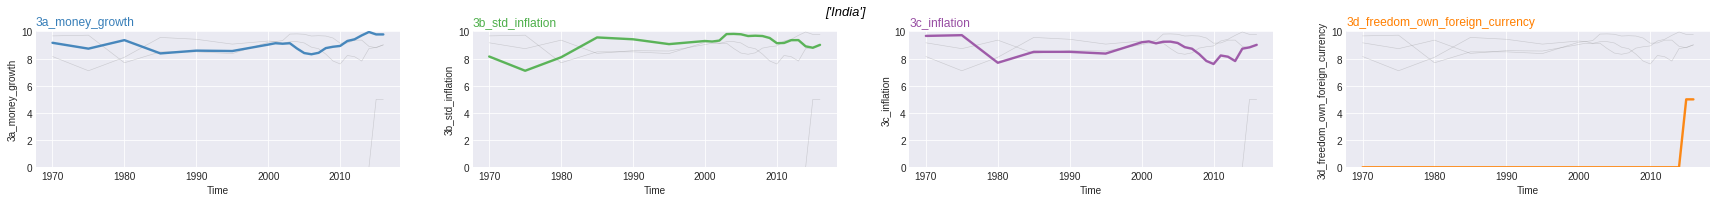

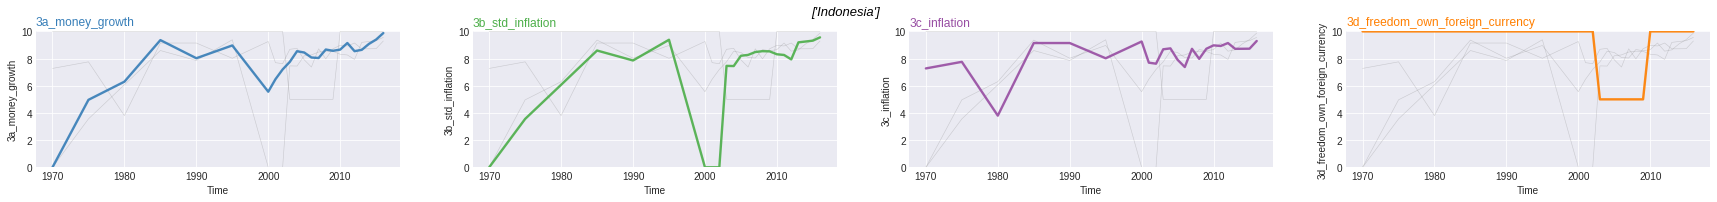

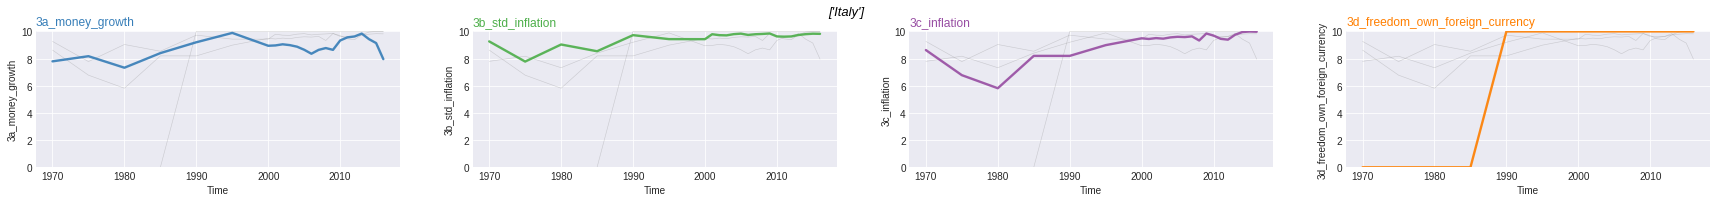

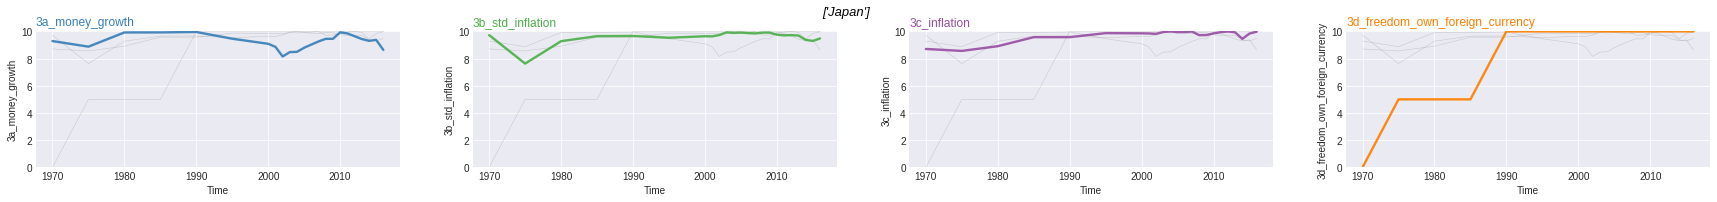

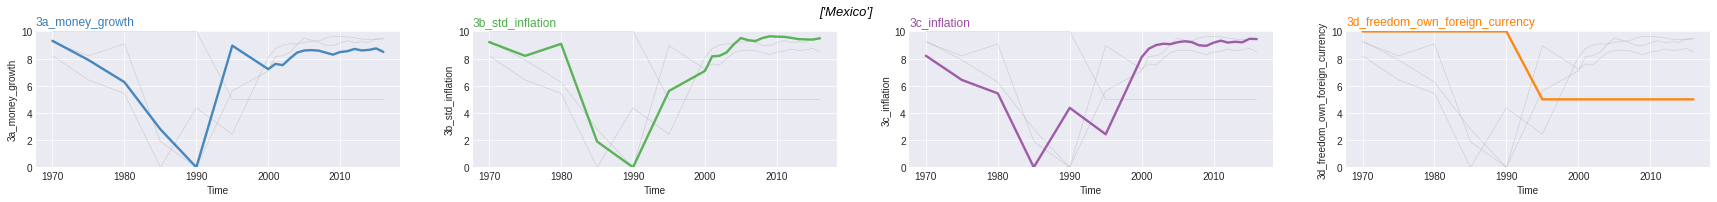

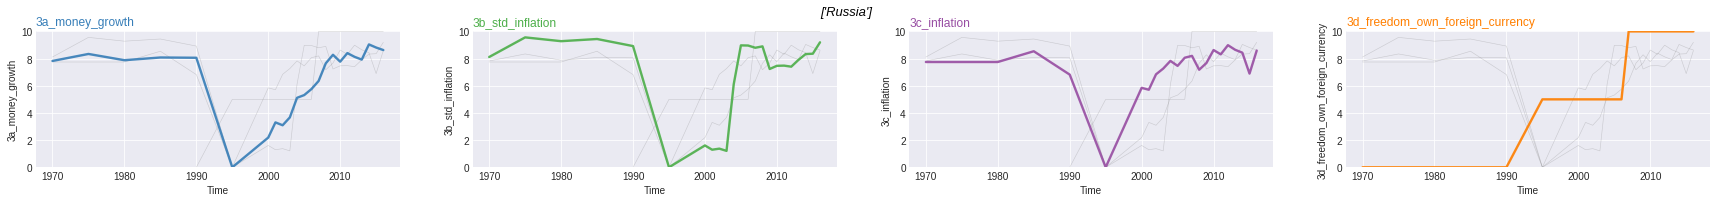

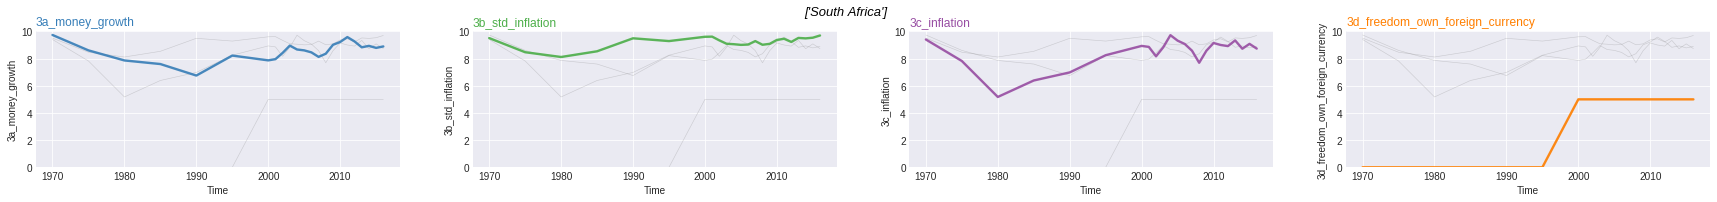

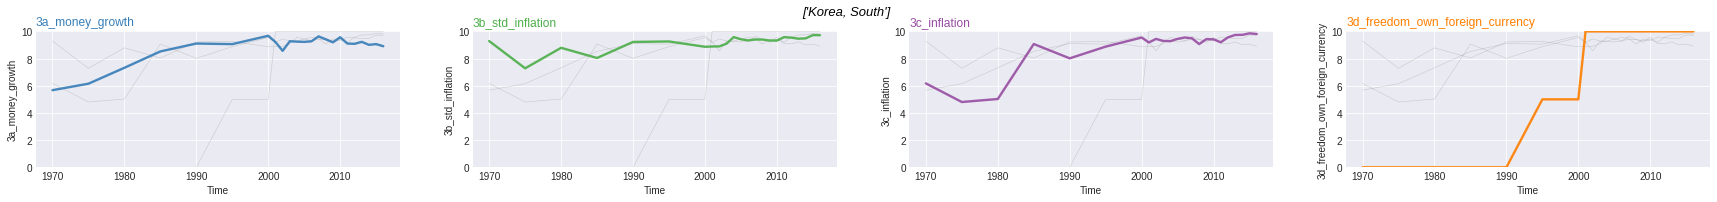

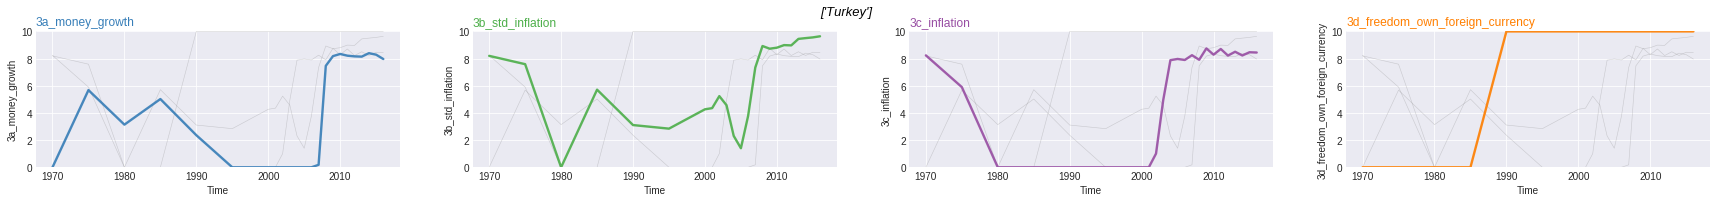

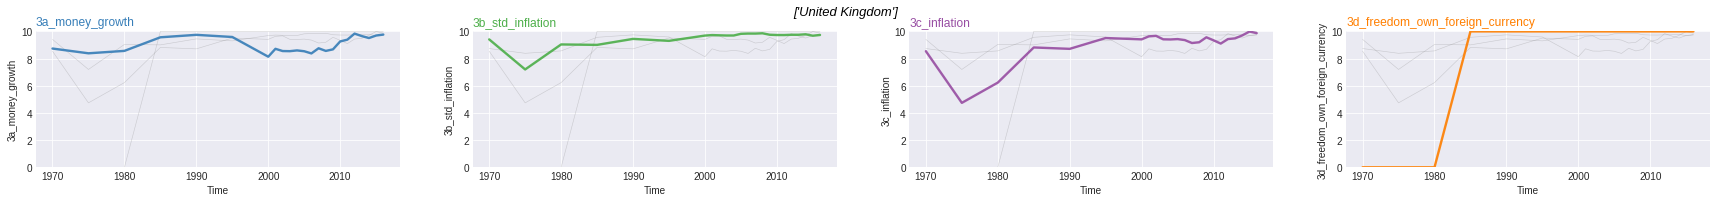

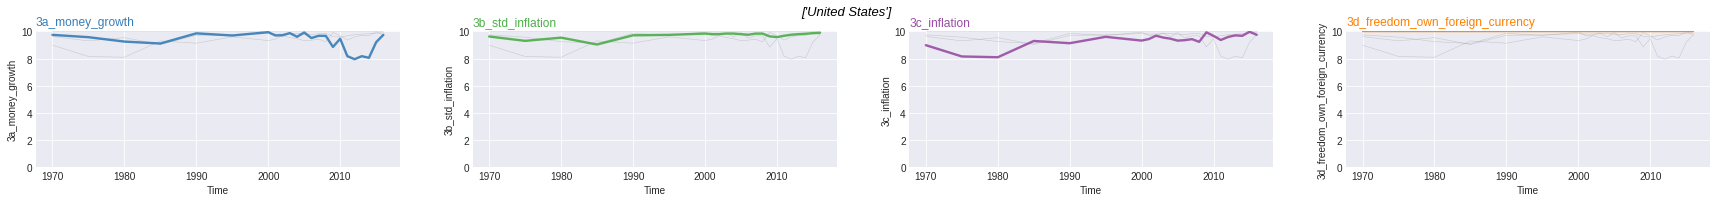

In [0]:
num = 0
for i in new_df1_lst:
  num += 1
  if not i.empty:
    efw_multi_comp3(i)
    plt.savefig('sound_money_timeseries'+str(num)+'.png')

In [0]:
#gs dataset
arg2 = gs.loc[gs.country == 'Argentina'].sort_values(by = ['year'])
aus2 = gs.loc[gs.country == 'Australia'].sort_values(by = ['year'])
brz2 = gs.loc[gs.country == 'Brazil'].sort_values(by = ['year'])
can2 = gs.loc[gs.country == 'Canada'].sort_values(by = ['year'])
Chn2 = gs.loc[gs.country == 'China'].sort_values(by = ['year'])
Grm2 = gs.loc[gs.country == 'Germany'].sort_values(by = ['year'])
Frn2 = gs.loc[gs.country == 'France'].sort_values(by = ['year'])
Ind2 = gs.loc[gs.country == 'India'].sort_values(by = ['year'])
Ina2 = gs.loc[gs.country == 'Indonesia'].sort_values(by = ['year'])
Ity2 = gs.loc[gs.country == 'Italy'].sort_values(by = ['year'])
Jpn2 = gs.loc[gs.country == 'Japan'].sort_values(by = ['year'])
Mex2 = gs.loc[gs.country == 'Mexico'].sort_values(by = ['year'])
Rus2 = gs.loc[gs.country == 'Russia'].sort_values(by = ['year'])
SA2 = gs.loc[gs.country == 'Saudi Arabia'].sort_values(by = ['year'])
Saf2 = gs.loc[gs.country == 'South Africa'].sort_values(by = ['year'])
SK2 = gs.loc[gs.country == 'Korea, South'].sort_values(by = ['year'])
Tky2 = gs.loc[gs.country == 'Turkey'].sort_values(by = ['year'])
UK2 = gs.loc[gs.country == 'United Kingdom'].sort_values(by = ['year'])
US2 = gs.loc[gs.country == 'United States'].sort_values(by = ['year'])
new_df2_ls = [arg2, aus2, brz2, can2, Chn2, Grm2, Frn2, Ind2, Ina2, Ity2, Jpn2, Mex2, Rus2, SA2, Saf2, SK2, Tky2, UK2, US2]
new_df2 = pd.concat([arg2, aus2, brz2, can2, Chn2, Grm2, Frn2, Ind2, Ina2, Ity2, Jpn2, Mex2, Rus2, SA2, Saf2, SK2, Tky2, UK2, US2])

Correlation Heatmap of Socioeconomic Measures

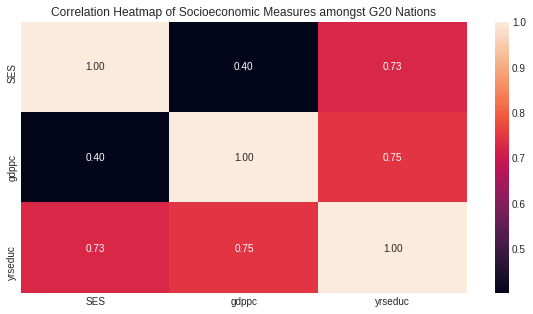

In [0]:
#Plotting graph
plt.figure(figsize = (10, 5))
sns.heatmap(new_df2[['SES', 'gdppc', 'yrseduc']].corr(), annot = True, fmt = '.2f')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlation Heatmap of Socioeconomic Measures amongst G20 Nations')
plt.savefig('Correlation Heatmap of Socioeconomic Measures.png')

In [0]:
def ses_comp(dataf):
  country = str(dataf.country.unique())
  plt.figure(figsize = (10, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['SES']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 1, num)
  
      # plot every groups, but discrete
      for v in dataf[['SES']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(1), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,100)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(1) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return

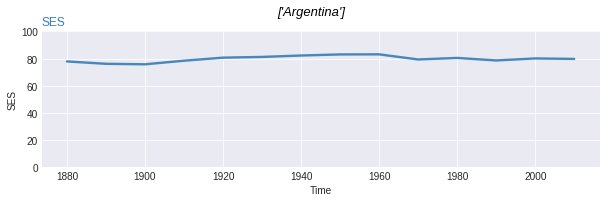

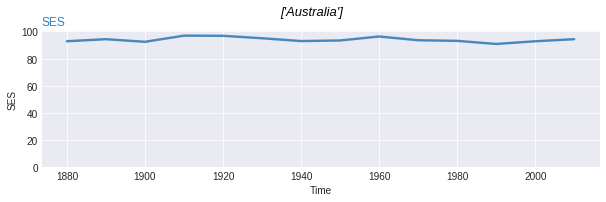

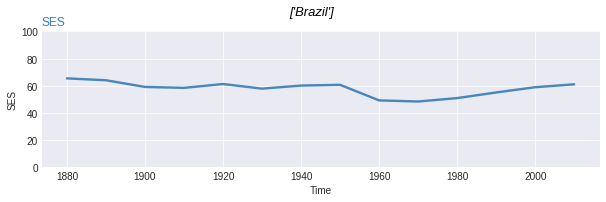

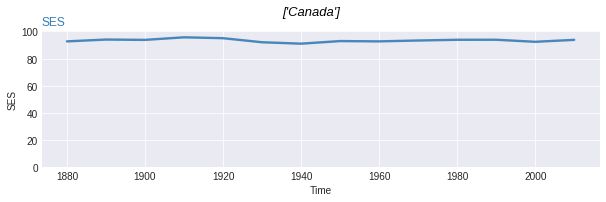

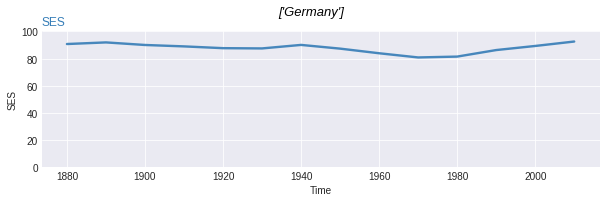

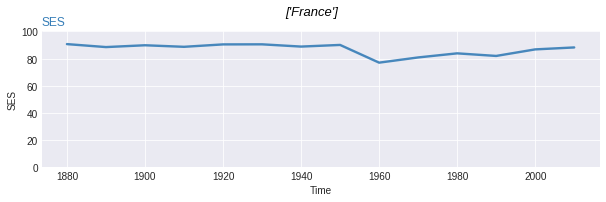

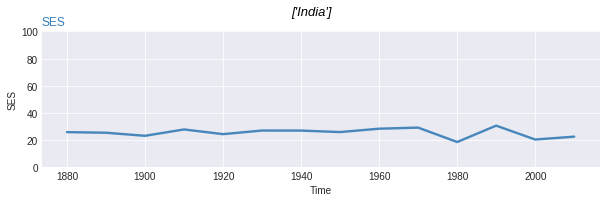

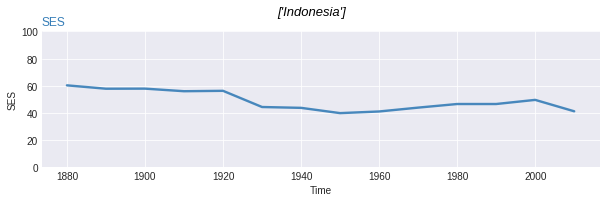

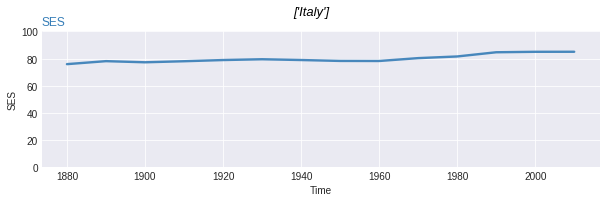

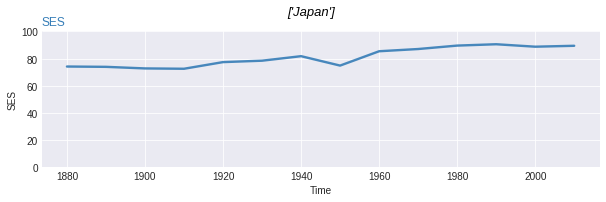

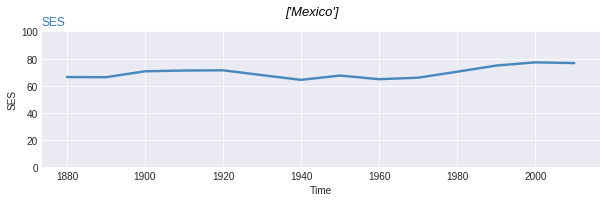

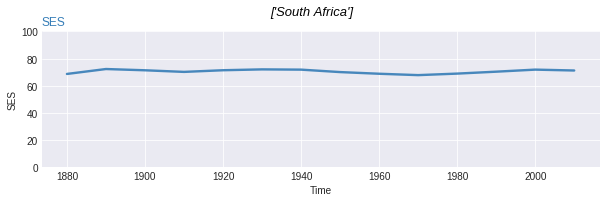

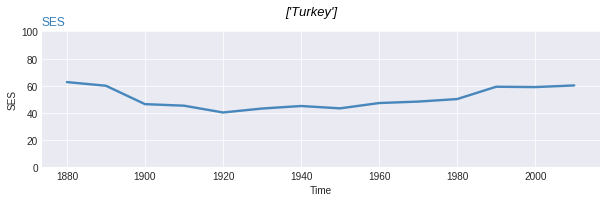

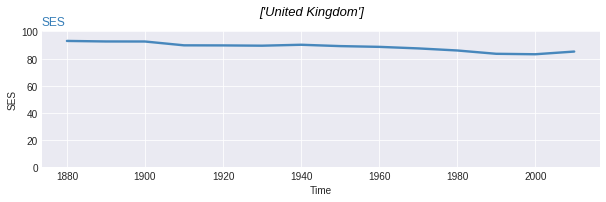

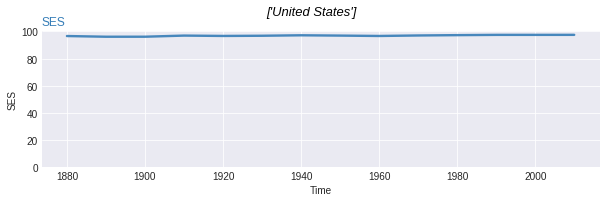

In [0]:
num = 0
for i in new_df2_ls:
  num += 1
  if not i.empty:
    ses_comp(i)
    plt.savefig('socioeconomic_timeseries'+str(num)+'.png')

In [0]:
def gdppc_comp(dataf):
  country = str(dataf.country.unique())
  plt.figure(figsize = (10, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['gdppc']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 1, num)
  
      # plot every groups, but discrete
      for v in dataf[['gdppc']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(2), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,80000)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(2) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return

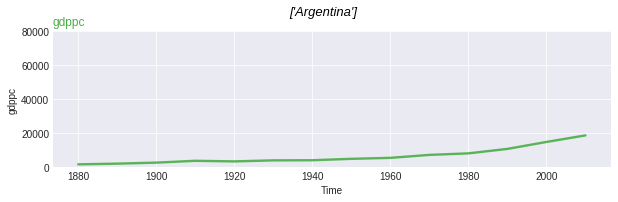

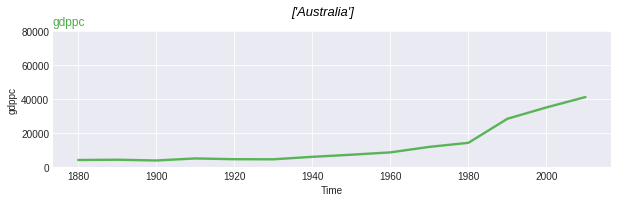

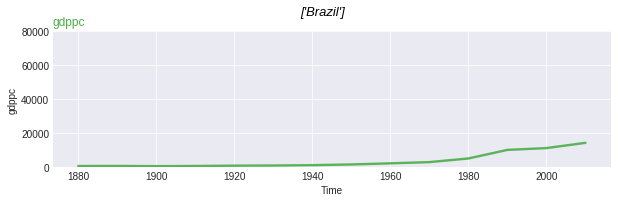

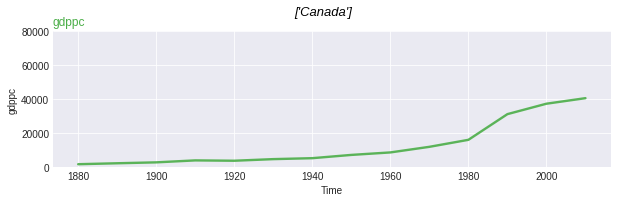

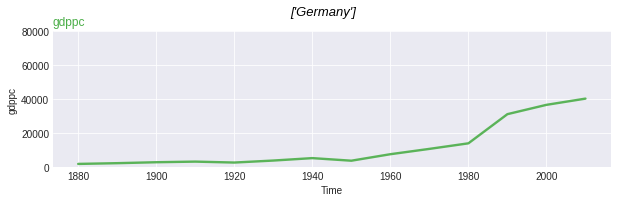

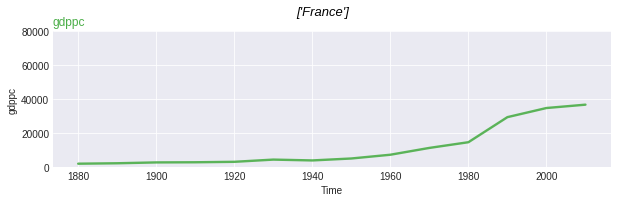

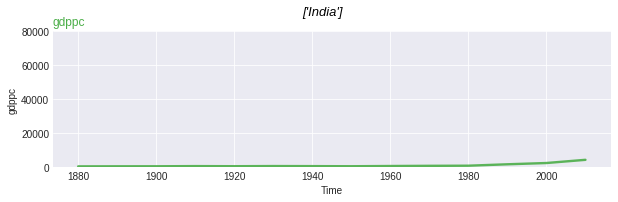

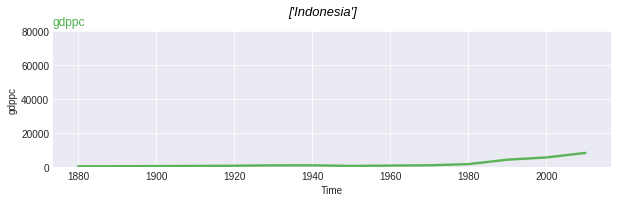

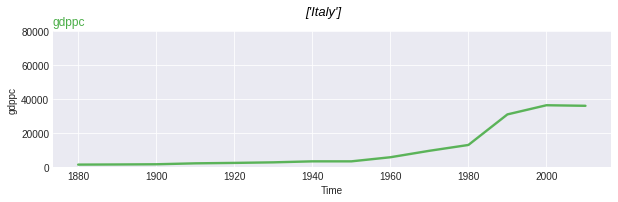

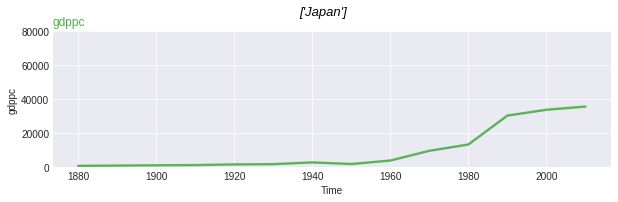

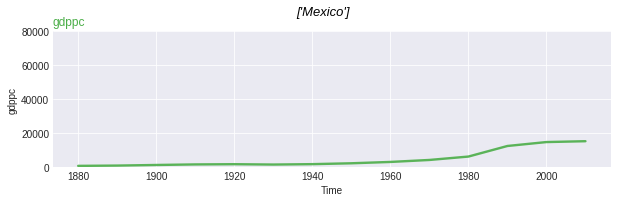

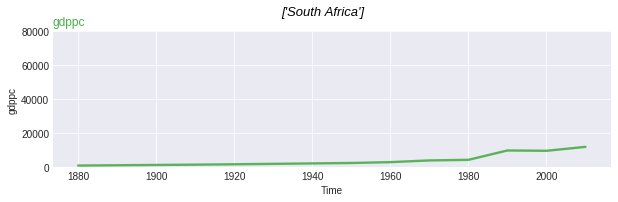

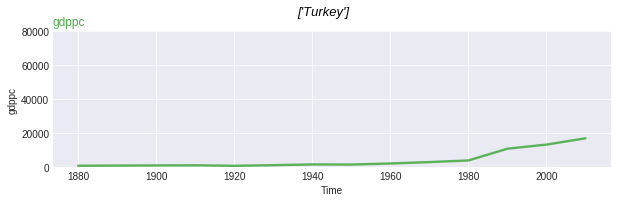

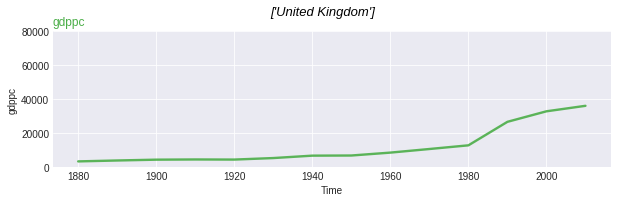

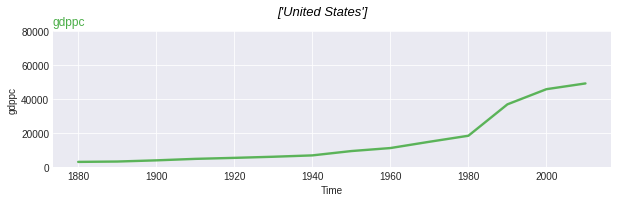

In [0]:
num = 0
for i in new_df2_ls:
  num += 1
  if not i.empty:
    gdppc_comp(i)
    plt.savefig('gdppc_timeseries'+str(num)+'.png')

In [0]:
def yrseduc_comp(dataf):
  country = str(dataf.country.unique())
  plt.figure(figsize = (10, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['yrseduc']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 1, num)
  
      # plot every groups, but discrete
      for v in dataf[['yrseduc']]:
          plt.plot(dataf['year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['year'], dataf[column], marker='', color=palette(3), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      plt.ylim(0,20)

      # Not ticks everywhere
      if num in range(20) :
          plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20] :
          plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(3) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return

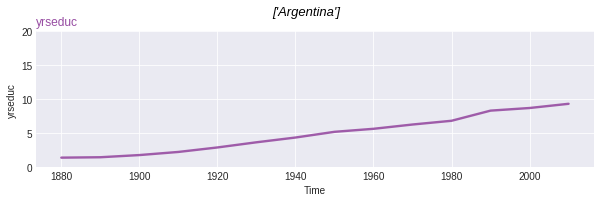

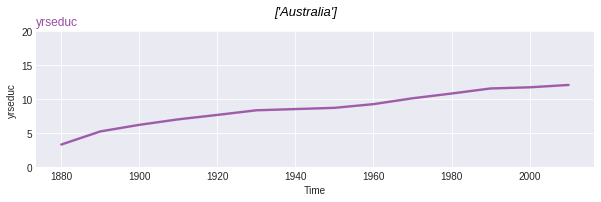

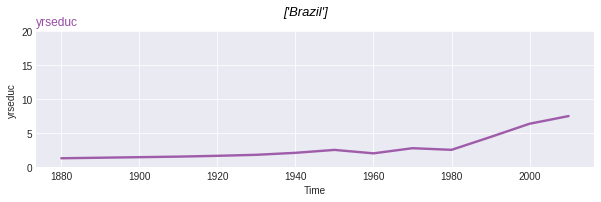

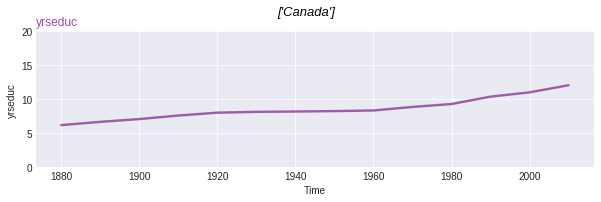

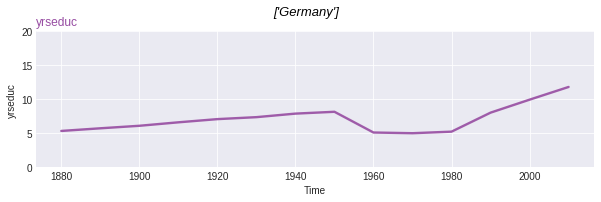

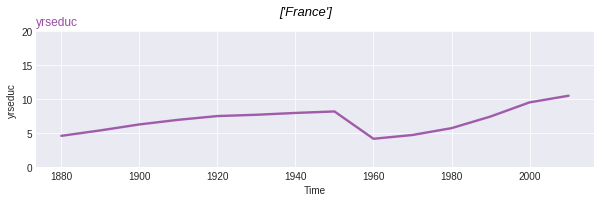

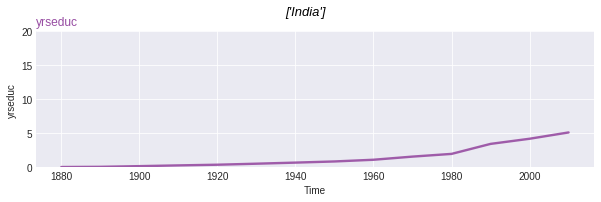

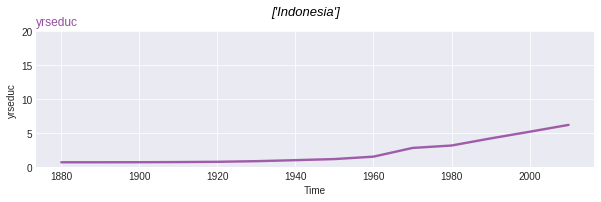

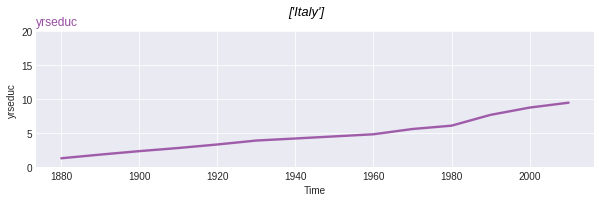

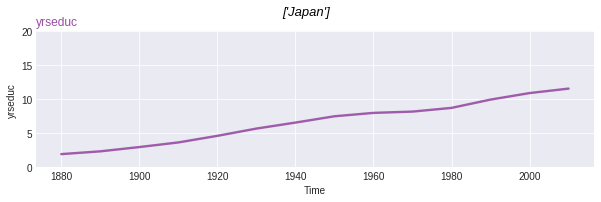

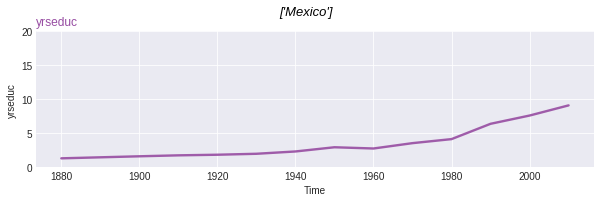

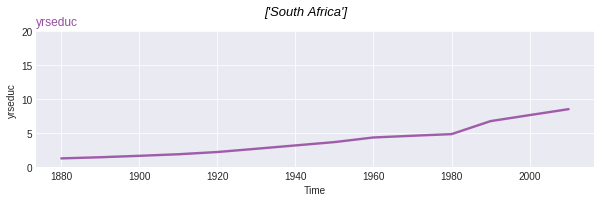

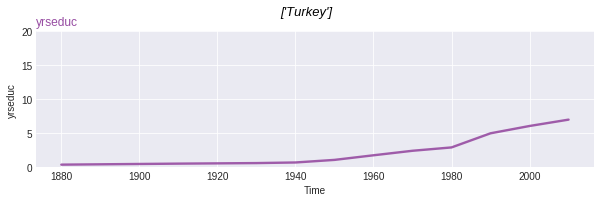

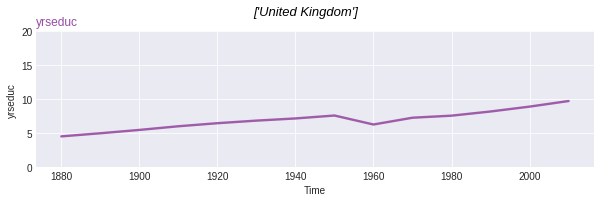

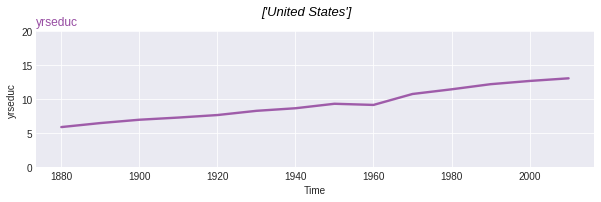

In [0]:
num = 0
for i in new_df2_ls:
  num += 1
  if not i.empty:
    yrseduc_comp(i)
    plt.savefig('socioeconomic_timeseries'+str(num)+'.png')

In [0]:
#le dataset
arg3 = le.loc[le.Country == 'Argentina']
aus3 = le.loc[le.Country == 'Australia']
brz3 = le.loc[le.Country == 'Brazil']
can3 = le.loc[le.Country == 'Canada']
Chn3 = le.loc[le.Country == 'China']
Grm3 = le.loc[le.Country == 'Germany']
Frn3 = le.loc[le.Country == 'France']
Ind3 = le.loc[le.Country == 'India']
Ina3 = le.loc[le.Country == 'Indonesia']
Ity3 = le.loc[le.Country == 'Italy']
Jpn3 = le.loc[le.Country == 'Japan']
Mex3 = le.loc[le.Country == 'Mexico']
Rus3 = le.loc[le.Country == 'Russia']
SA3 = le.loc[le.Country == 'Saudi Arabia']
Saf3 = le.loc[le.Country == 'South Africa']
SK3 = le.loc[le.Country == 'Korea, South']
Tky3 = le.loc[le.Country == 'Turkey']
UK3 = le.loc[le.Country == 'United Kingdom']
US3 = le.loc[le.Country == 'United States']
new_df3_ls = [arg3, aus3, brz3, can3, Chn3, Grm3, Frn3, Ind3, Ina3, Ity3, Jpn3, Mex3, Rus3, SA3, Saf3, SK3, Tky3, UK3, US3]
new_df3 = pd.concat([arg3, aus3, brz3, can3, Chn3, Grm3, Frn3, Ind3, Ina3, Ity3, Jpn3, Mex3, Rus3, SA3, Saf3, SK3, Tky3, UK3, US3])

(20.0, 0.0)

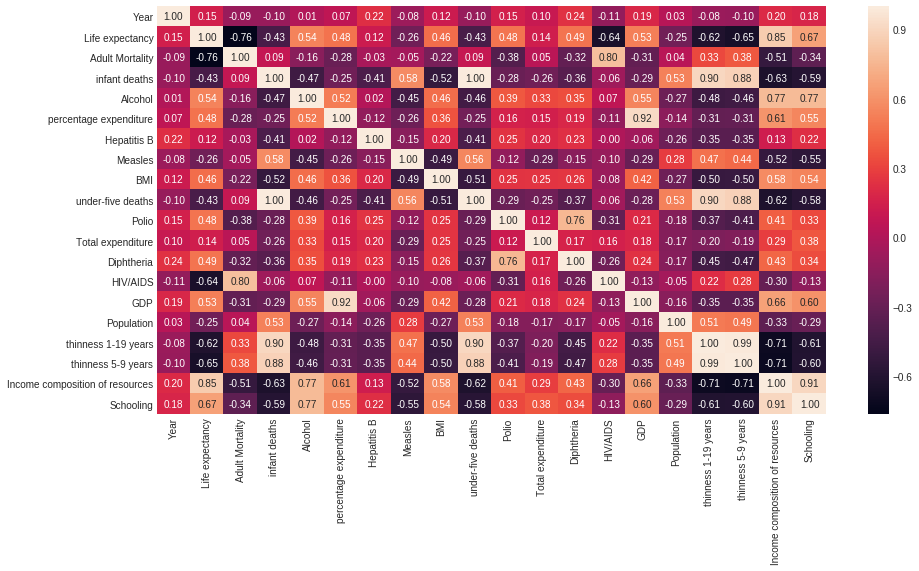

In [0]:
#Plotting graph
plt.figure(figsize = (15, 7.5))
sns.heatmap(new_df3.corr(), annot = True, fmt = '.2f')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [0]:
def le_multi_comp1(dataf):
  country = str(dataf.Country.unique())
  plt.figure(figsize = (30, 2.5))
  # Initialize the figure
  plt.style.use('seaborn-darkgrid')
  
  # create a color palette
  palette = plt.get_cmap('Set1')
  
  # multiple line plot
  num=0
  for column in dataf[['Hepatitis B', 'Measles', 'HIV/AIDS', 'Polio']]:
      
      num+=1
  
      # Find the right spot on the plot
      plt.subplot(1, 4, num)
  
      # plot every groups, but discrete
      for v in dataf[['Hepatitis B', 'Measles', 'HIV/AIDS', 'Polio']]:
          plt.plot(dataf['Year'], dataf[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
  
      # Plot the lineplot
      plt.plot(dataf['Year'], dataf[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
      plt.xlabel('Time')
      plt.ylabel(str(column))
      # Same limits for everybody!
      #plt.xlim(1970,2016)
      if column == 'Hepatitis B':
        plt.ylim(0,100)
      elif column == 'Measles':
        plt.ylim(0,215000)
      elif column == 'HIV/AIDS':
        plt.ylim(0, 60)
        '''
        if country == 'South Africa':
          plt.ylim(0, 60)
        else:
          plt.ylim(0,10)
        '''
      elif column == 'Polio':
        plt.ylim(0, 100)

      # Not ticks everywhere
      if num in range(20):
        plt.tick_params(labelbottom='off')
      if num not in [1,4,7,10,13,17,20]:
        plt.tick_params(labelleft='off')
          
      # Add title
      plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
  
  # general title
  
  plt.suptitle(country, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
  '''
  # Axis title
  plt.text(0.5, 0.02, 'Time', ha='center', va='center')
  plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
  '''
  return

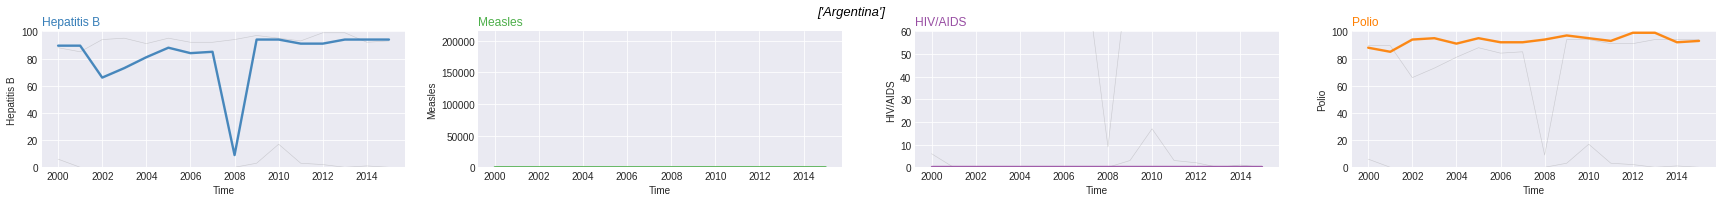

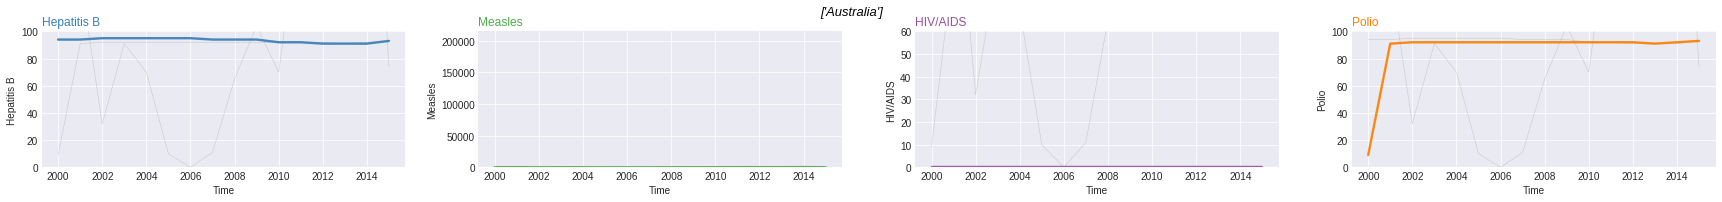

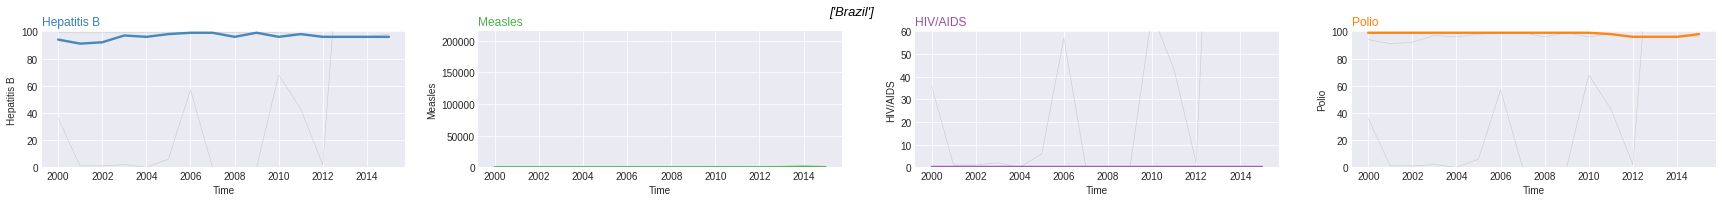

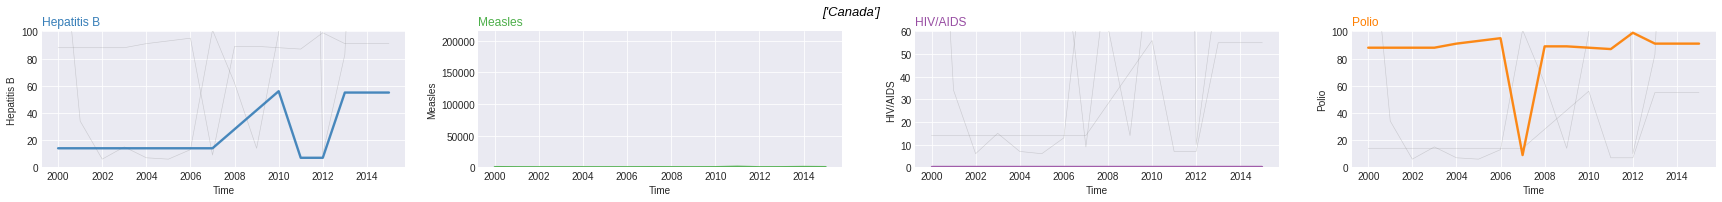

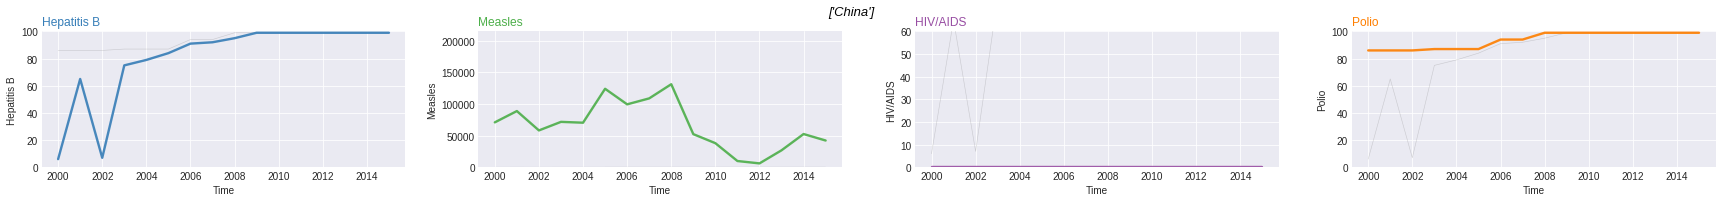

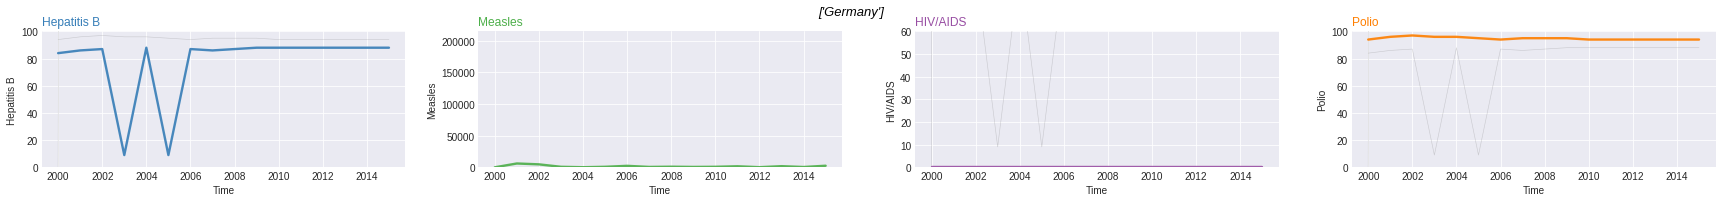

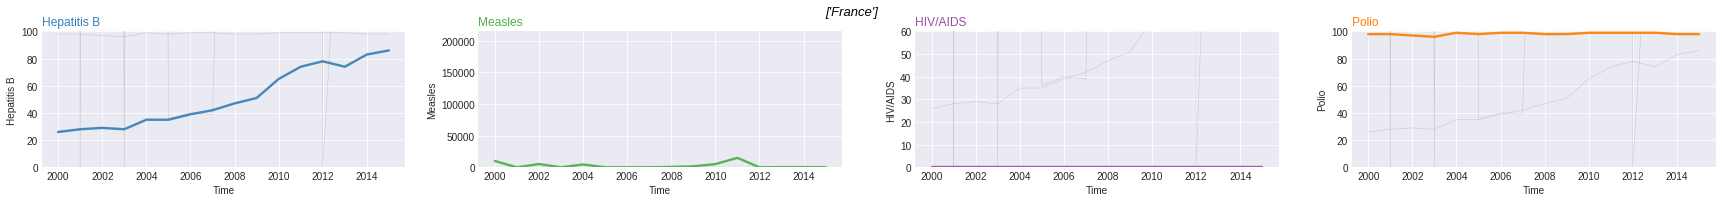

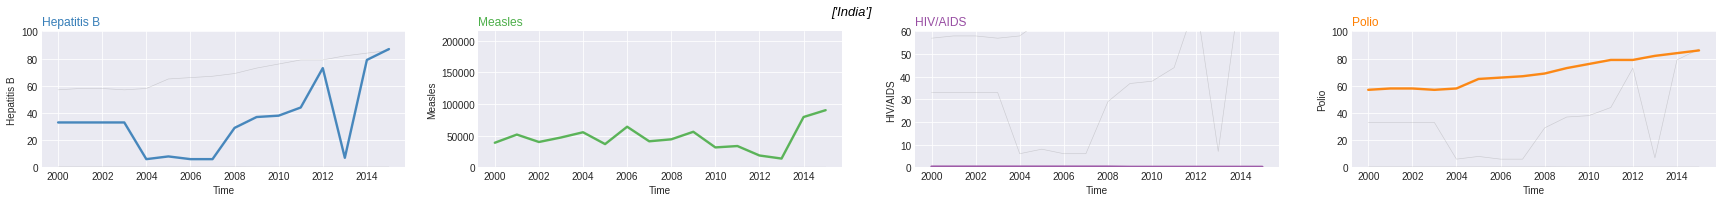

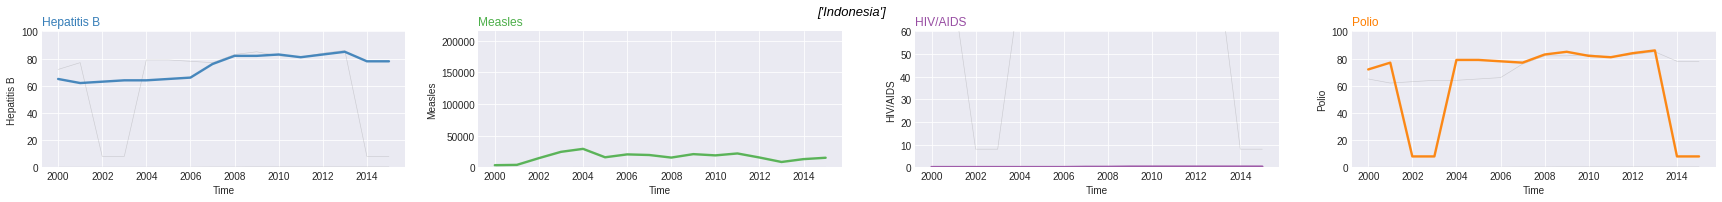

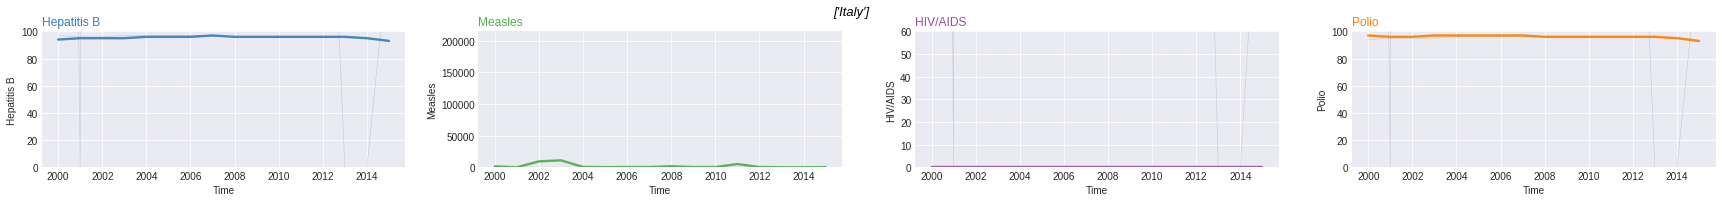

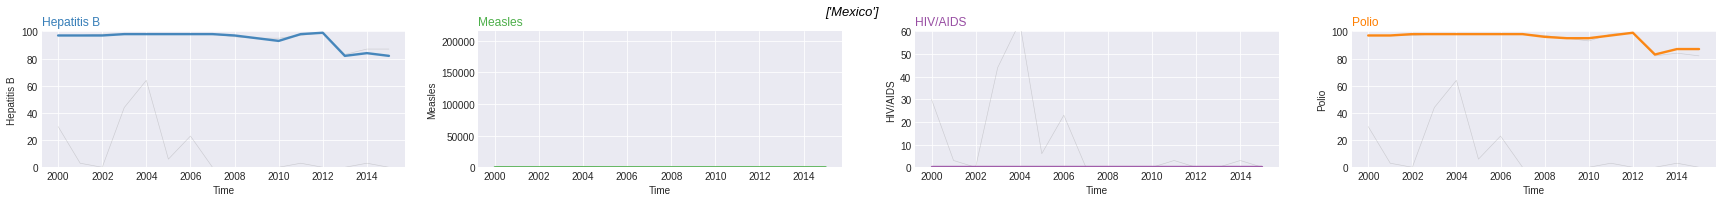

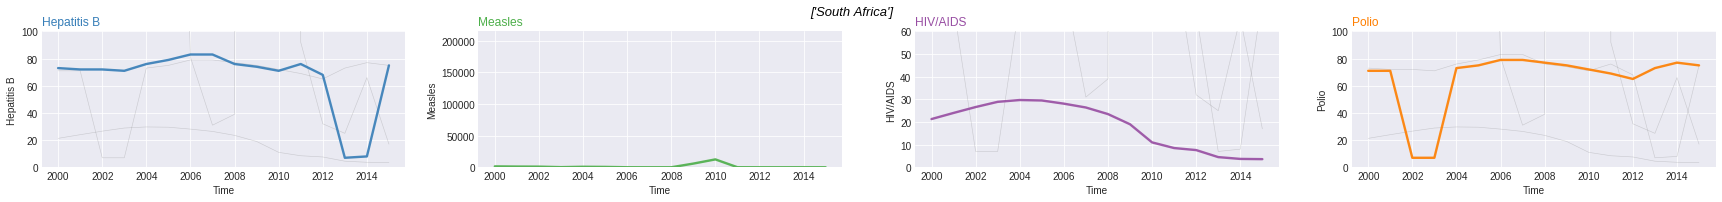

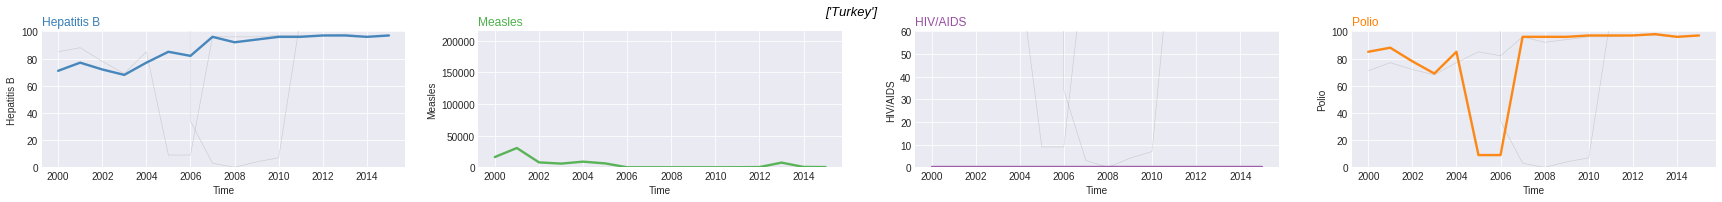

In [0]:
for i in new_df3_ls:
  if not i.empty:
    le_multi_comp1(i)

Charting processing first began with the comparison made between years of education, sound money and wellbeing of the population measures. To prepare the data for effective analysis in graphical form the pandas join function was utilised, completed first between the le and efw data frames. Before this was achieved the keys that had to be joined on from required renaming to allow this.

In [0]:
# Renaming values so that tables dataframes can be joined
new_df1.rename(columns={'countries': 'Country', 'year': 'Year'}, inplace=True)
efw.rename(columns={'countries': 'Country', 'year': 'Year'}, inplace=True)
new_df2.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)
gs.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)

Then the following joined data frames were produced.

In [0]:
le_efw_g20 = pd.merge(new_df1, new_df3, on=['Country', 'Year'])
gs_le_efw_g20 = pd.merge(new_df2, le_efw_g20, on=['Country', 'Year'])
le_efw = pd.merge(efw, le, on=['Country', 'Year'])
gs_le_efw = pd.merge(gs, le_efw, on = ['Country', 'Year'])

Although this was initially intended to further the findings of the topic mentioned above, the gs_le_efw data frame was also exported as a csv for use in table analysis. This allowed for a quick comparison amongst most of the G20 countries and all the countries in the years 2000 and 2010 (produced in different
data frames). Note that some G20 countries were excluded by the fact that inconsistencies between the individual le and efw data frames were disallowed joining by the pandas function.

In [0]:
#Exporting as a table csv
gs_le_efw_g20.to_csv('gs_le_efw_g20.csv', index = None, header = True)
gs_le_efw.to_csv('gs_le_efw.csv', index = None, header = True)

## Years of Education: Wellbeing of the Population (life expectancy, percentage expenditure(Expenditure on Health as a % of GDP per Capita), population) vs Sound Money (Section 3 indicators)

Correlation Heatmap to Compare Against All Measures (only g20 nations)

Again, slightly deviating from chart production of the above topic, a correlation heatmap utilising the seaborn library was produced. This showcased all the measures that had been joined from the gs_le_efw dataframe and allowed analysts of the report to gain a quick understanding of how particular measures were correlated. Moreover, initial issues arose from which the top and bottom of the heatmap had been cut off. This required a quick solution that involved a plt.ylim(). Finally, the chart was exported as a png file for external use within this report.

In [0]:
gs_le_efw_g20.columns

Index(['unid', 'wbid', 'Country', 'Year', 'SES', 'gdppc', 'yrseduc', 'popshare', 'ISO_code', 'ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'un

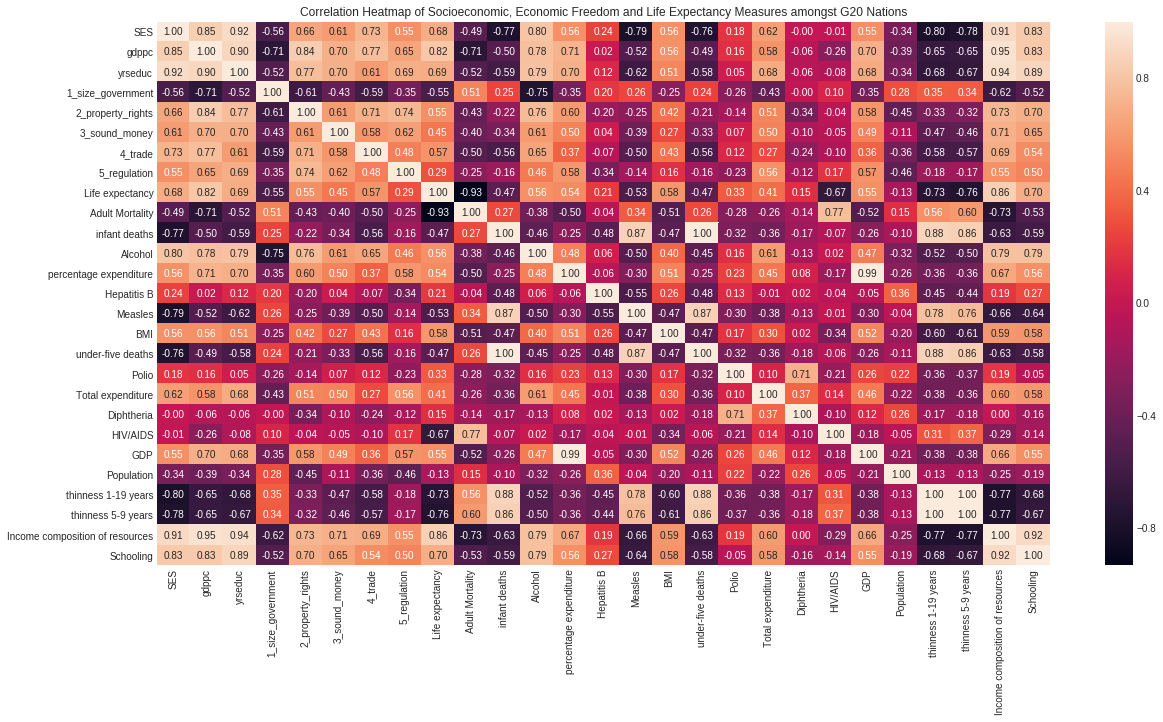

In [0]:
#Plotting graph
plt.figure(figsize = (20, 10))
sns.heatmap(gs_le_efw_g20[['SES', 'gdppc','yrseduc', '1_size_government','2_property_rights','3_sound_money','4_trade','5_regulation' ,'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']].corr(), annot = True, fmt = '.2f')
plt.title('Correlation Heatmap of Socioeconomic, Economic Freedom and Life Expectancy Measures amongst G20 Nations')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('Correlation Heatmap of Socioeconomic, Economic Freedom and Life Expectancy Measures.png')

Returning to the intended focus of the topic, processing and manipulating of the dataframes was then addressed to produce the life expectancy to sound money ratio bar graphs. The ratio column was first produced through using the code shown below.

In [0]:
# creating a new column to extend analysis across different dataframes comparisons
le_efw_g20['le_sm_ratio'] = le_efw_g20['Life expectancy']/le_efw_g20['3_sound_money']

### Graphical Country Comparison with le_sm_ratio

Having attained the appropriate measures, a for loop was utilised to efficiently produce each ratio graph to their respective year, 2000 to 2015. To do this a list names years was created so that the for loop would loop through each iterative year through which the pd.loc function would filter the rows relevant to the year specified in the loop. These filtered measures in the temporary df data frame were then displayed using matplotlib tools with an additional reference line running at y = 9.

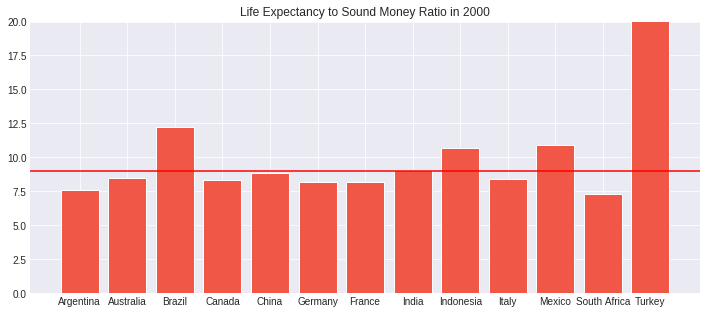

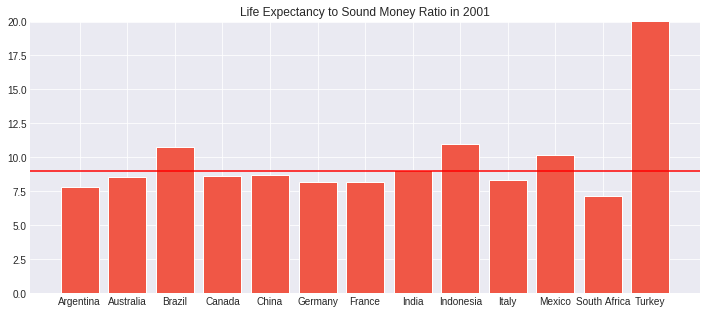

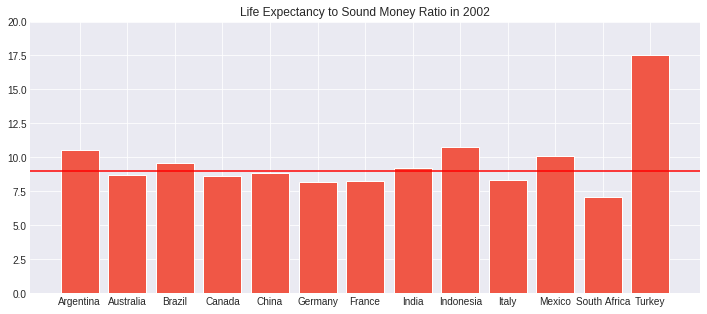

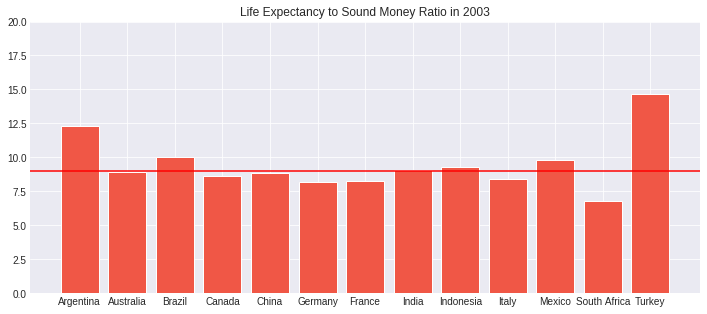

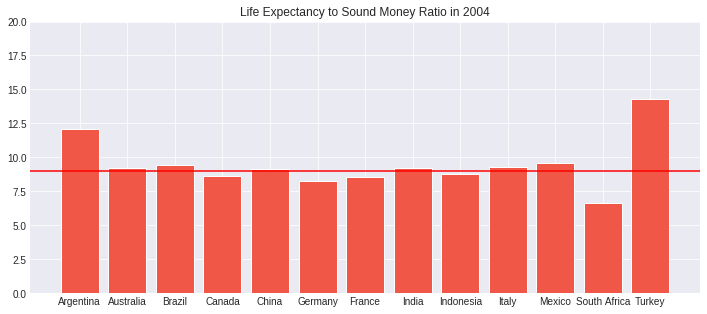

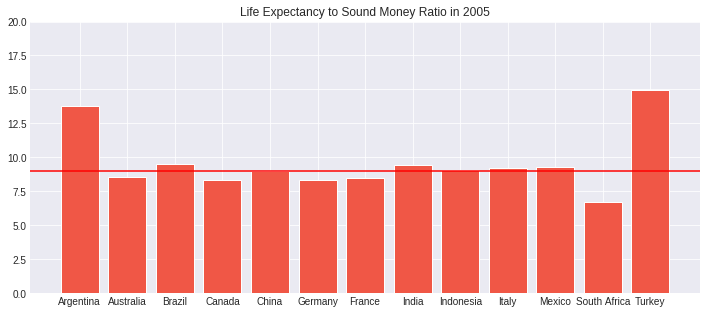

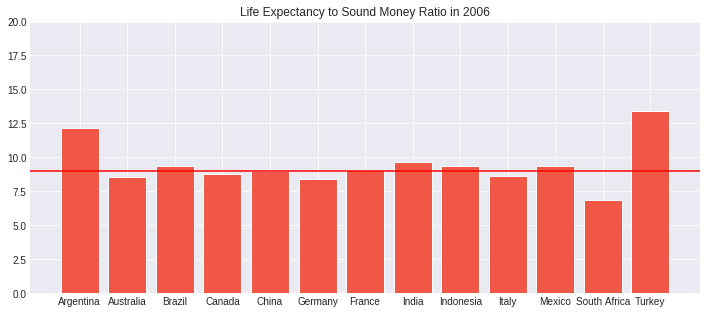

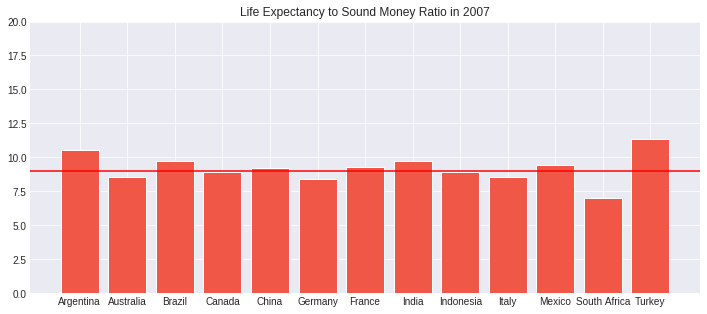

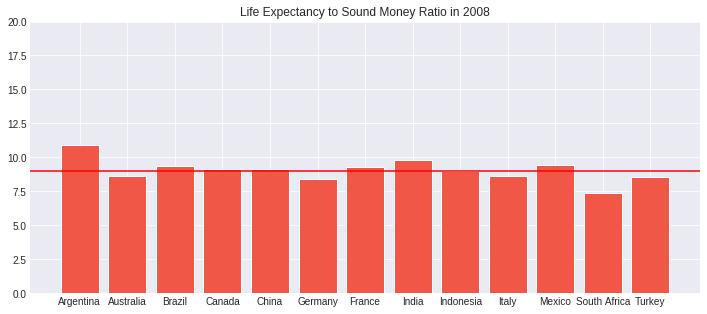

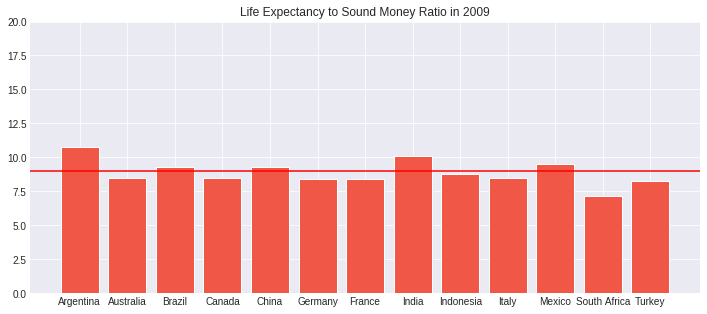

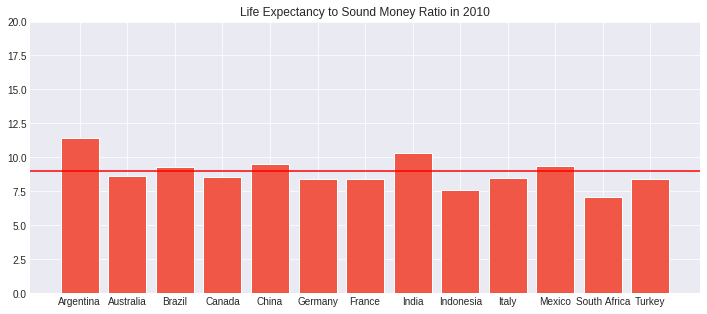

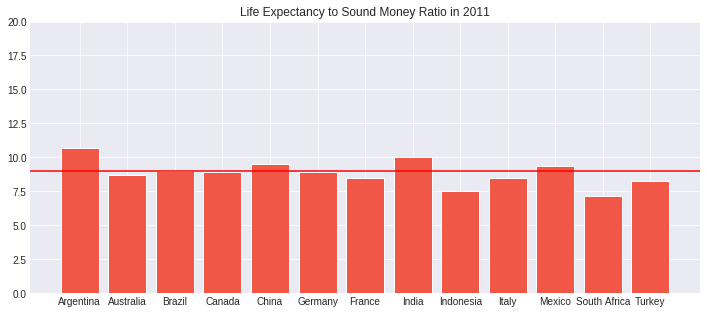

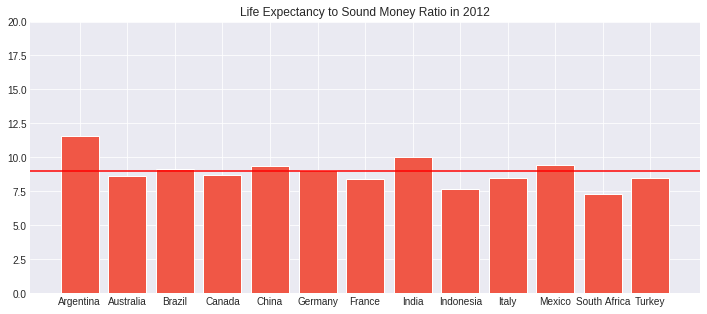

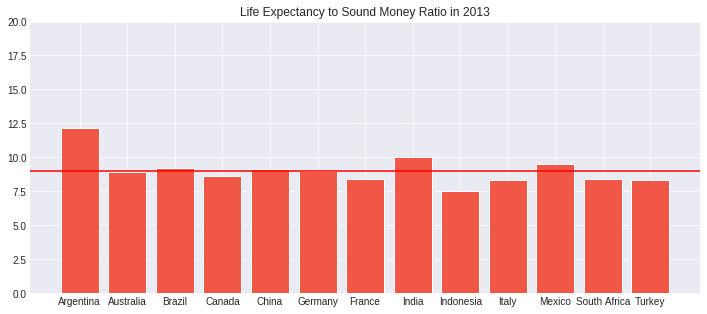

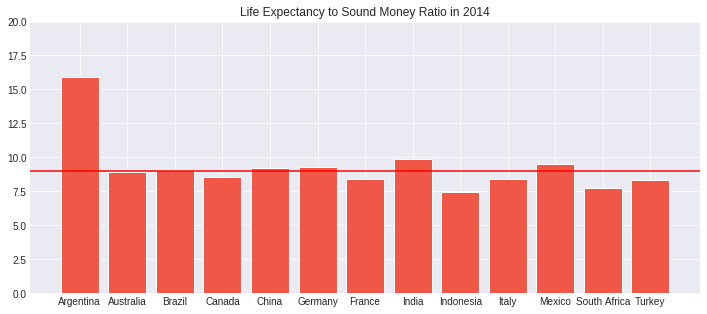

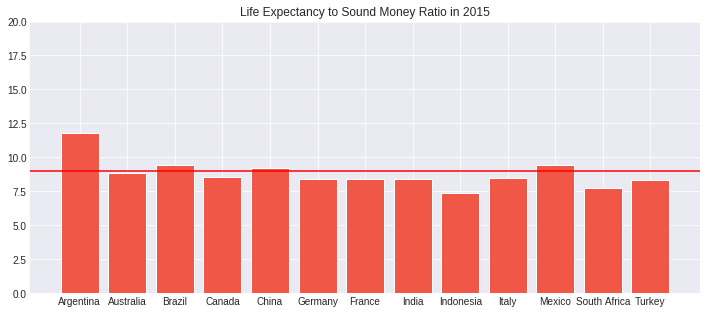

In [0]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
#country = str(dataf.Country.unique())
# Initialize the figure
plt.style.use('seaborn-darkgrid')
  
# create a color palette
palette = plt.get_cmap('Set1')
num=0
for i in years:
  num+=1
  plt.figure(figsize = (12, 5))
  #plt.subplot(5, 1, num)
  i = int(i)
  df = le_efw_g20.loc[le_efw_g20['Year']==i]
  plt.bar(df['Country'], df['le_sm_ratio'], color = '#f05746')
  plt.ylim(0,20)
  plt.axhline(y=9, color = 'red')
  plt.title('Life Expectancy to Sound Money Ratio in ' + str(i))
  plt.savefig('LE to SM Ratio'+str(i)+'.png')
  plt.show()

### Life Expectancy Vs Yrs of Education

In [0]:
new_df2.columns

Index(['unid', 'wbid', 'Country', 'Year', 'SES', 'gdppc', 'yrseduc', 'popshare'], dtype='object')

A custom colour palette was made with a list of hex code colours, whilst the random package was imported to shuffle the order of the colours.

In [0]:
import random
nice_colours = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075']
random.shuffle(nice_colours)

#ffe119


Following this, to delineate the relationship between years of education and life expectancy the same joining process as detailed above was applied.

In [0]:
# Renaming values so that tables dataframes can be joined
gs.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)
new_df2.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)

In [0]:
g20_yrseduc_le = pd.merge(new_df2, new_df3, on = ['Country', 'Year'])
yrseduc_le = pd.merge(gs, le, on=['Country', 'Year'])

In preparation of the years of education and life expectancy seaborn scatter plot a list named countries was produced with the names of all the G20 nations contained within the g20_yrseduc_le data frame, its importance being described soon.



PLEASE NOTE: The shaded regions surrounding the trend lines is bootstrap confidence interval generated for the estimate; therefore a larger region represent.


In [0]:
countries = list(g20_yrseduc_le.Country.unique())
print(countries)

['Argentina', 'Australia', 'Brazil', 'Canada', 'Germany', 'France', 'India', 'Indonesia', 'Italy', 'Mexico', 'South Africa', 'Turkey']


### Correlation Heatmap of SES and LE Measures

(25.0, 0.0)

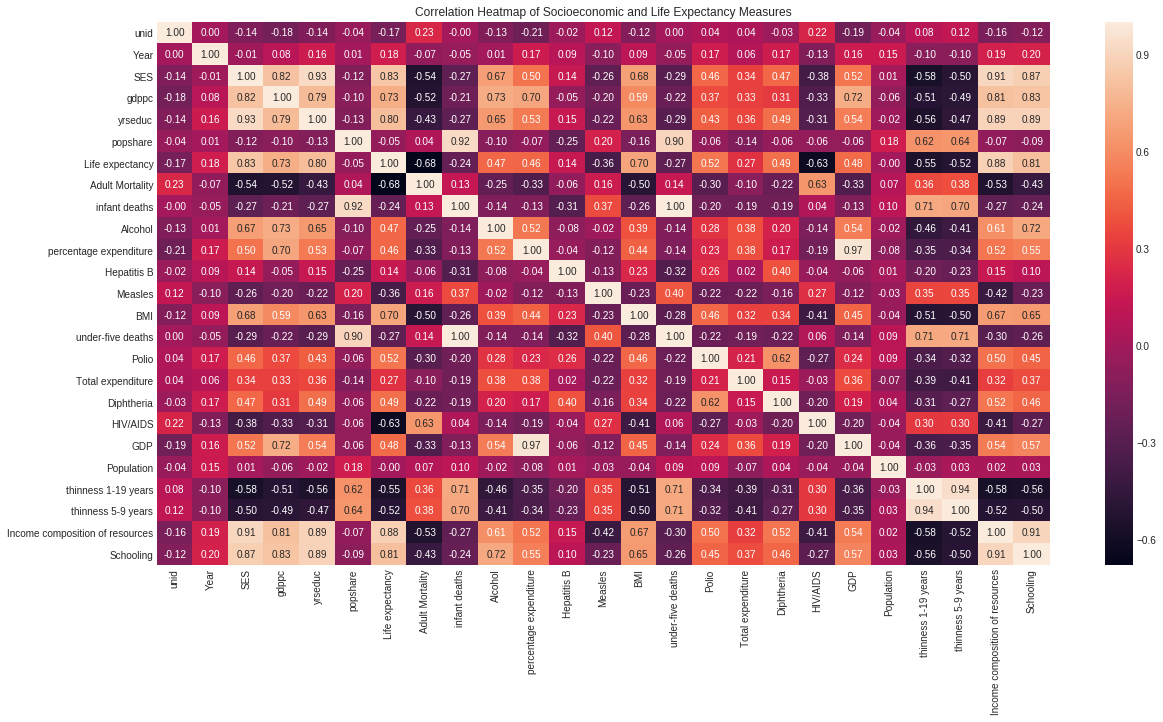

In [0]:
#Plotting graph
plt.figure(figsize = (20, 10))
sns.heatmap(yrseduc_le.corr(), annot = True, fmt = '.2f')
plt.title('Correlation Heatmap of Socioeconomic and Life Expectancy Measures')
#Fixing cut off issue with heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [0]:
# Draft 1 of Scatter plot
'''
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  plt.figure(figsize = (12, 5))
  #plt.subplot(5, 1, num)
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  plt.plot(df['yrseduc'], df['Life expectancy'], color = 'grey', linestyle='none', marker='o')
  num1 = 1
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    plt.plot(df2_ye['yrseduc'], df2_ye['Life expectancy'], color = nice_colours[num1], label = k, linestyle='none', marker='o')
    z = np.polyfit(x=df1.loc[:, 6], y=df.loc[:, 9], deg=1)
    p = np.poly1d(z)
    df1['trendline'] = p(df.loc[:, 6])
    num1+=1
    #https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot ; how to trend line with scatter plot
  plt.legend(countries)
  plt.xlabel('Yrs of Education')
  plt.ylabel('Life Expectancy')
  plt.ylim(0,100)
  plt.xlim(0,13)
  plt.title('Understanding the Correlation Betweeen Yrs of Education and Life Expectancy in ' + str(i))
  plt.show()
  '''

"\nyears_adj = [2000, 2010] \n# Initialize the figure\nplt.style.use('seaborn-darkgrid')\nnum=0\nfor i in years_adj:\n  num+=1\n  plt.figure(figsize = (12, 5))\n  #plt.subplot(5, 1, num)\n  i = int(i)\n  df = yrseduc_le.loc[yrseduc_le['Year']==i]\n  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]\n  plt.plot(df['yrseduc'], df['Life expectancy'], color = 'grey', linestyle='none', marker='o')\n  num1 = 1\n  for k in countries:\n    df2_ye = df1.loc[df1['Country'] == k]\n    df2_le = df1.loc[df1['Country'] == k]\n    plt.plot(df2_ye['yrseduc'], df2_ye['Life expectancy'], color = nice_colours[num1], label = k, linestyle='none', marker='o')\n    z = np.polyfit(x=df1.loc[:, 6], y=df.loc[:, 9], deg=1)\n    p = np.poly1d(z)\n    df1['trendline'] = p(df.loc[:, 6])\n    num1+=1\n    #https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot ; how to trend line with scatter plot\n  plt.legend(countries)\n  plt.xlabel('Yrs of Education')\n  plt.ylabel('Life Exp

Similarly to how the for-loop was applied in producing the ratio graphs the concept in which it would produce for different years was used here. Two temporary dataframes, df for the rest of the world and df1 for only G20 nations were created, with the intention of plotting a comparison between the distinguished group and the rest of the world.

A linear regression model was then produced for each group with a generalised grey scatter of plots for the world specified by the sns.scatterplot and the sns.regplot function.

Then to plot each specific G20 nation a nested for loop was used that looped through the countries list mentioned above with the custom list nice_colours being applied so that each country could be differentiated.

Using the ax.get_legend_handles_labels() function this was utilised with the intention to produce a legend where the handles and labels parameters would be automatically acquired. Finally, finishing touches were applied with the labels, title, limits and a final png being exported for external use in this report.

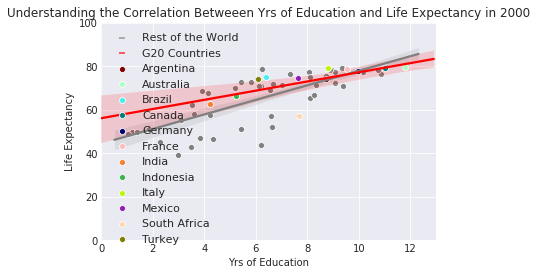

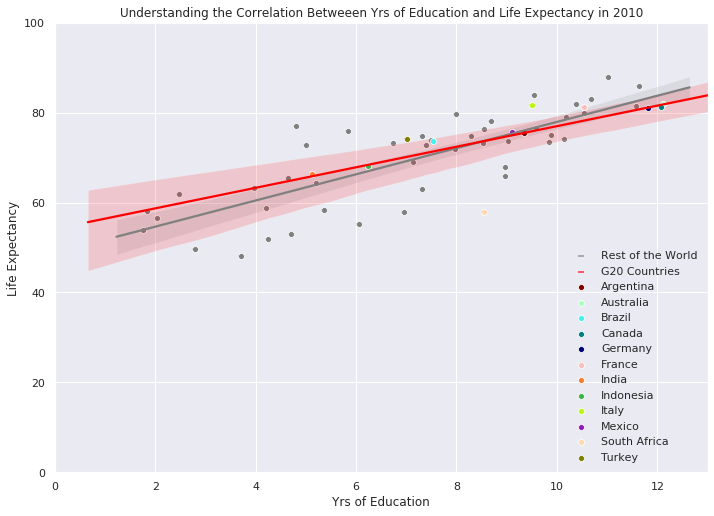

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  sns.regplot(df['yrseduc'], df['Life expectancy'], color = 'grey', label = 'Rest of the World',marker='_', ax=ax)
  sns.scatterplot(df['yrseduc'], df['Life expectancy'], color = 'grey',marker='o', ax=ax)
  num1 = 2
  sns.regplot(df1['yrseduc'], df1['Life expectancy'], color = 'red', label = 'G20 Countries', marker='_',ax=ax)
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['yrseduc'], df2_ye['Life expectancy'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('Yrs of Education')
  plt.ylabel('Life Expectancy')
  plt.ylim(0,100)
  plt.xlim(0,13)
  plt.title('Understanding the Correlation Betweeen Yrs of Education and Life Expectancy in ' + str(i))
  plt.savefig('Understanding the Correlation Between Yrs of Education and Life Expectancy in' + str(i))
  plt.show()

In [0]:
yrseduc_le.columns

Index(['unid', 'wbid', 'Country', 'Year', 'SES', 'gdppc', 'yrseduc', 'popshare', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

Similarly, this same process was utilised amongst the rest of the scatter plots only changing the data frames values for different measure comparisons, while limits were also adjusted to ensure no inaccuracies arose. The code and graphs are as follows:

### Expenditure on Health as a % of GDP Per Capita Vs Population

NameError: ignored

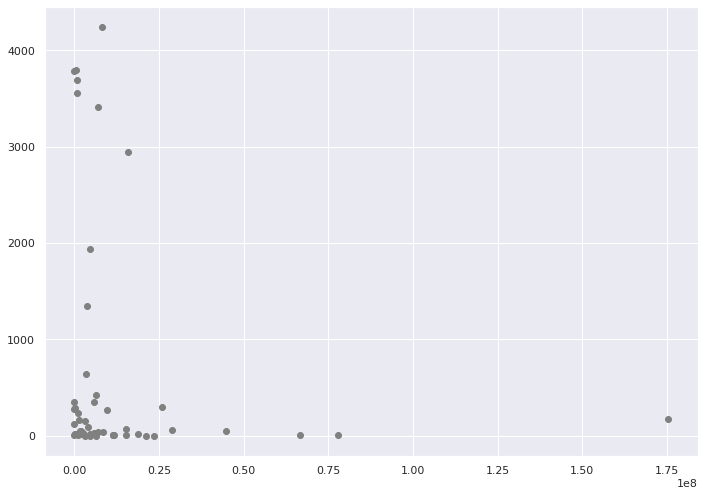

In [0]:
for i in years_adj:
  num+=1
  #fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  #sns.regplot(df['Population'], df['percentage expenditure'], color = 'grey', label = 'Rest of the World',marker='_', ci=None, ax=ax)
  plt.scatter(df['Population'], df['percentage expenditure'], color = 'grey',marker='o')
   
  #Fitting
  model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
  popt, pcov = curve_fit(model, df["Population"].values, df["percentage expenditure"].values, p0=[1,0,2,0])
  #plot fit
  x = np.linspace(df["Population"].values.min(),df["percentage expenditure"].values.max(),250)
  plt.plot(x,model(x,*popt), label="fit")

  # Fitting
  model2 = lambda x, sigma:  model(x,1,0,sigma,0)
  popt2, pcov2 = curve_fit(model2, df["Population"].values, df["percentage expenditure"].values, p0=[2])
  #plot fit2
  x2 = np.linspace(df["Population"].values.min(),df["percentage expenditure"].values.max(),250)
  plt.plot(x2,model2(x2,*popt2), label="fit2")
  plt.show()

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  sns.regplot(df['Population'], df['percentage expenditure'], color = 'grey', label = 'Rest of the World',marker='_', ci=None, ax=ax)
  sns.scatterplot(df['Population'], df['percentage expenditure'], color = 'grey',marker='o', ax=ax)
   
   
  #Fitting
  model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
  popt, pcov = curve_fit(model, df["Population"].values, df["percentage expenditure"].values, p0=[1,0,2,0])
  #plot fit
  x = np.linspace(df["Population"].values.min(),df["percentage expenditure"].values.max(),250)
  plt.plot(x,model(x,*popt), label="fit")

  # Fitting
  model2 = lambda x, sigma:  model(x,1,0,sigma,0)
  popt2, pcov2 = curve_fit(model2, df["Population"].values, df["percentage expenditure"].values, p0=[2])
  #plot fit2
  x2 = np.linspace(df["Population"].values.min(),df["percentage expenditure"].values.max(),250)
  plt.plot(x2,model2(x2,*popt2), label="fit2")
  plt.show()
  
  num1 = 2
  sns.regplot(df1['Population'], df1['percentage expenditure'], color = 'red', label = 'G20 Countries', ci=None, marker='_',ax=ax)
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['Population'], df2_ye['percentage expenditure'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('Population')
  plt.ylabel('Expenditure on Health as a % of GDP Per Capita')
  #plt.ylim(0,100)
  #plt.xlim(0,13)
  plt.title('Understanding the Correlation Betweeen Population and Expenditure on Health as a % of GDP Per Capita in ' + str(i))
  plt.show()

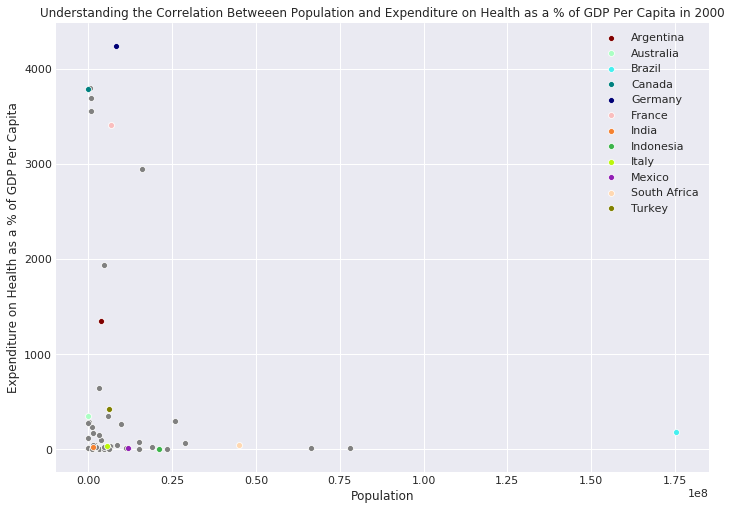

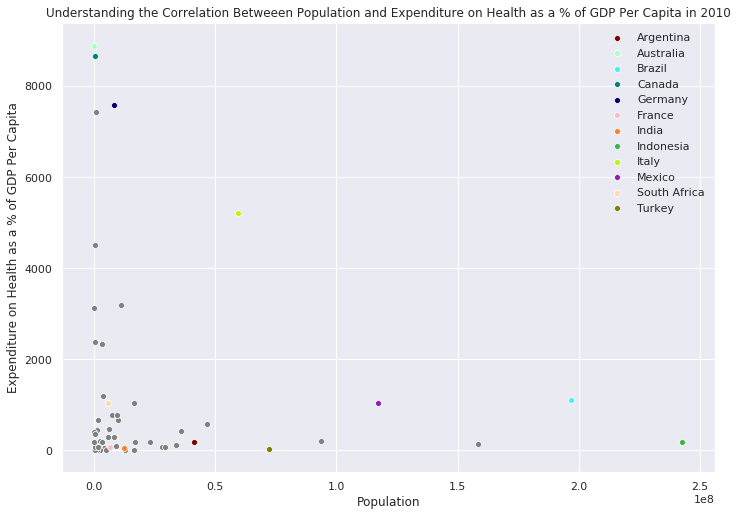

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  #sns.regplot(df['Population'], df['percentage expenditure'], color = 'grey', label = 'Rest of the World',marker='_', ci=None, ax=ax)
  sns.scatterplot(df['Population'], df['percentage expenditure'], color = 'grey',marker='o', ax=ax)
  num1 = 2
  #sns.regplot(df1['Population'], df1['percentage expenditure'], color = 'red', label = 'G20 Countries', ci=None, marker='_',ax=ax)
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['Population'], df2_ye['percentage expenditure'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('Population')
  plt.ylabel('Expenditure on Health as a % of GDP Per Capita')
  #plt.ylim(0,100)
  #plt.xlim(0,13)
  plt.title('Understanding the Correlation Betweeen Population and Expenditure on Health as a % of GDP Per Capita in ' + str(i))
  plt.savefig('Understanding the Correlation Betweeen Population and Expenditure on Health as a % of GDP Per Capita in ' + str(i))
  plt.show()

The above was an attempt to delineate which model would work most appropriately for regression. Now we will proceed with linear regression in the next section to make predictions.

## GDPpc: Indicators of Personal Health (Adult Mortality, Infant Deaths, BMI, Alcohol) vs Country’s Freedom of Trade (Section 4 indicators)

BMI Vs Alcohol Consumption

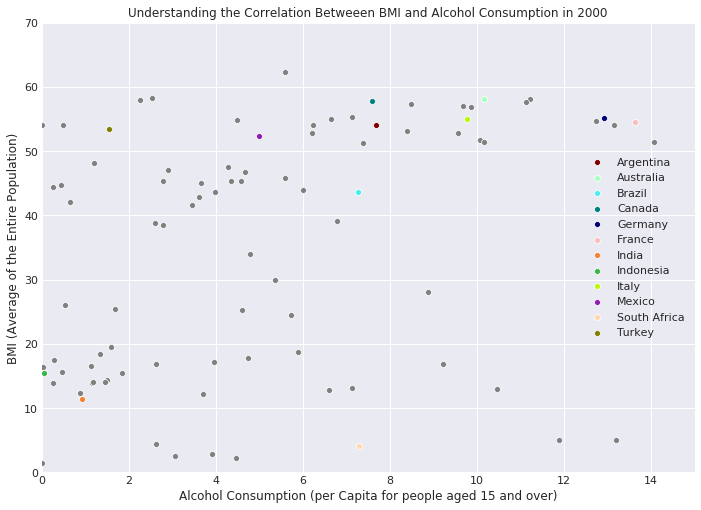

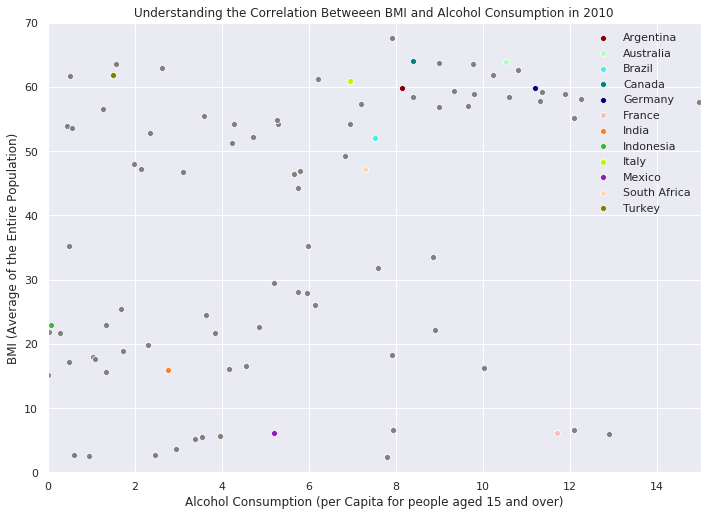

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = le_efw.loc[le_efw['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  #sns.regplot(df['Alcohol'], df['BMI'], color = 'grey', label = 'Rest of the World',marker='_', ci=None, ax=ax)
  sns.scatterplot(df['Alcohol'], df['BMI'], color = 'grey',marker='o', ax=ax)
  num1 = 2
  #sns.regplot(df1['Alcohol'], df1['BMI'], color = 'red', label = 'G20 Countries', ci=None, marker='_',ax=ax)
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['Alcohol'], df2_ye['BMI'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('Alcohol Consumption (per Capita for people aged 15 and over)')
  plt.ylabel('BMI (Average of the Entire Population)')
  plt.ylim(0,70)
  plt.xlim(0,15)
  plt.title('Understanding the Correlation Betweeen BMI and Alcohol Consumption in ' + str(i))
  plt.savefig('Understanding the Correlation Betweeen BMI and Alcohol Consumption in ' + str(i))  
  plt.show()

### GDPpc Vs Alcohol Consumption

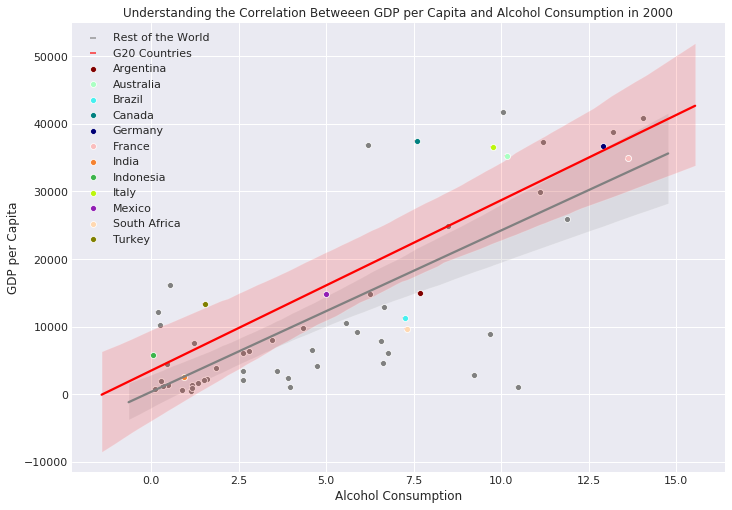

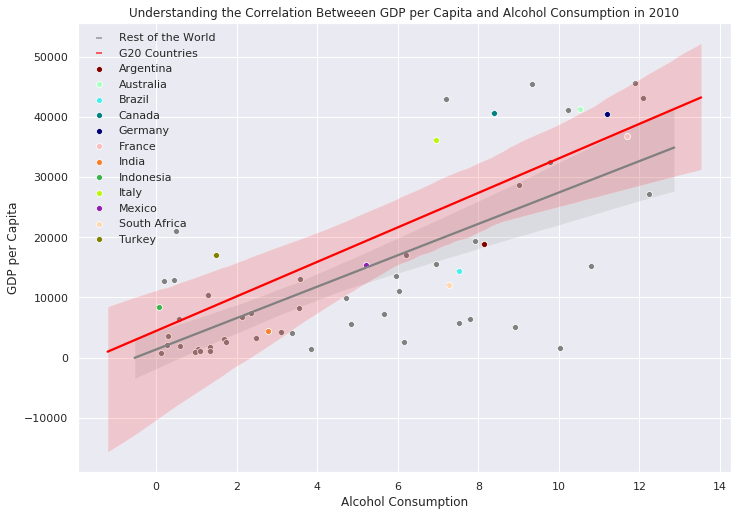

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = yrseduc_le.loc[yrseduc_le['Year']==i]
  df1 = g20_yrseduc_le.loc[g20_yrseduc_le['Year']==i]
  sns.regplot(df['Alcohol'], df['gdppc'], color = 'grey', label = 'Rest of the World',marker='_', ax=ax)
  sns.scatterplot(df['Alcohol'], df['gdppc'], color = 'grey',marker='o', ax=ax)
  num1 = 2
  sns.regplot(df1['Alcohol'], df1['gdppc'], color = 'red', label = 'G20 Countries', marker='_',ax=ax)
  for k in countries:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['Alcohol'], df2_ye['gdppc'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('Alcohol Consumption')
  plt.ylabel('GDP per Capita')
  #plt.ylim(0,100)
  #plt.xlim(0,13)
  plt.title('Understanding the Correlation Betweeen GDP per Capita and Alcohol Consumption in ' + str(i))
  plt.savefig('Understanding the Correlation Betweeen GDP per Capita and Alcohol Consumption in ' + str(i))
  plt.show()

### Degree of Trade Vs GDPpc

In [0]:
# Renaming values so that tables dataframes can be joined
gs.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)

In [0]:
gs_efw_g20 = pd.merge(new_df2, new_df1, on=['Country', 'Year'])
gs_efw = pd.merge(gs, efw, on=['Country', 'Year'])

In [0]:
countries2 = list(gs_efw_g20.Country.unique())
print(countries)

['Argentina', 'Australia', 'Brazil', 'Canada', 'Germany', 'France', 'India', 'Indonesia', 'Italy', 'Mexico', 'South Africa', 'Turkey']


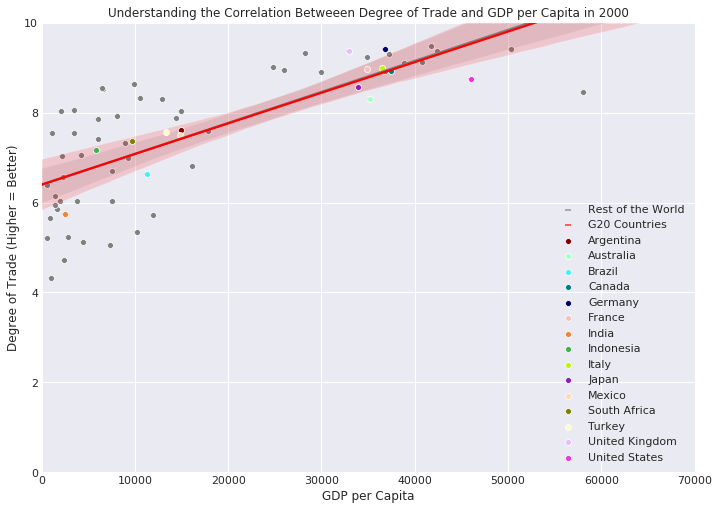

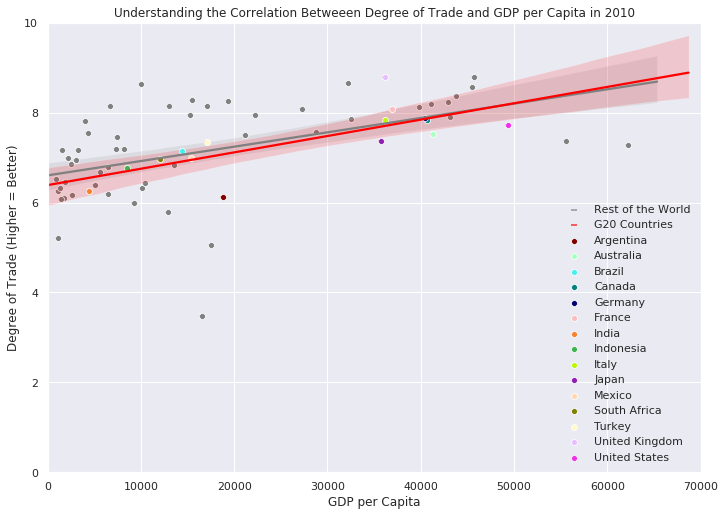

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = gs_efw.loc[gs_efw['Year']==i]
  df1 = gs_efw_g20.loc[gs_efw_g20['Year']==i]
  sns.regplot(df['gdppc'], df['4_trade'], color = 'grey', label = 'Rest of the World',marker='_', ax=ax)
  sns.scatterplot(df['gdppc'], df['4_trade'], color = 'grey',marker='o', ax=ax)
  num1 = 2
  sns.regplot(df1['gdppc'], df1['4_trade'], color = 'red', label = 'G20 Countries', marker='_',ax=ax)
  for k in countries2:
    df2_ye = df1.loc[df1['Country'] == k]
    df2_le = df1.loc[df1['Country'] == k]
    g20_plot = sns.scatterplot(df2_ye['gdppc'], df2_ye['4_trade'], color = nice_colours[num1], label = k, marker='o', ax=ax)
    g20_plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    num1+=1
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels)
  plt.xlabel('GDP per Capita')
  plt.ylabel('Degree of Trade (Higher = Better)')
  plt.ylim(0,10)
  plt.xlim(0,70000)
  plt.title('Understanding the Correlation Betweeen Degree of Trade and GDP per Capita in ' + str(i))
  plt.savefig('Understanding the Correlation Betweeen Degree of Trade and GDP per Capita in ' + str(i))
  plt.show()

## SES: Diseases (Hepatitis B, measles, HIV/AIDS, Polio) vs Government Influence (Section1 indicators)

Again, utilising the same techniques to produce the above scatter plots slight alterations were applied to the following graphs, some of these being the addition of a size attribute to make a four way comparison. To make use of this, the nested for loop that was used previously had to be removed while the hue attribute within the seaborn plot substituted for this. All other aspects and techniques remained the same otherwise.

In [0]:
df1.columns

Index(['unid', 'wbid', 'Country', 'Year', 'SES', 'gdppc', 'yrseduc', 'popshare', 'ISO_code', 'ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation'], dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


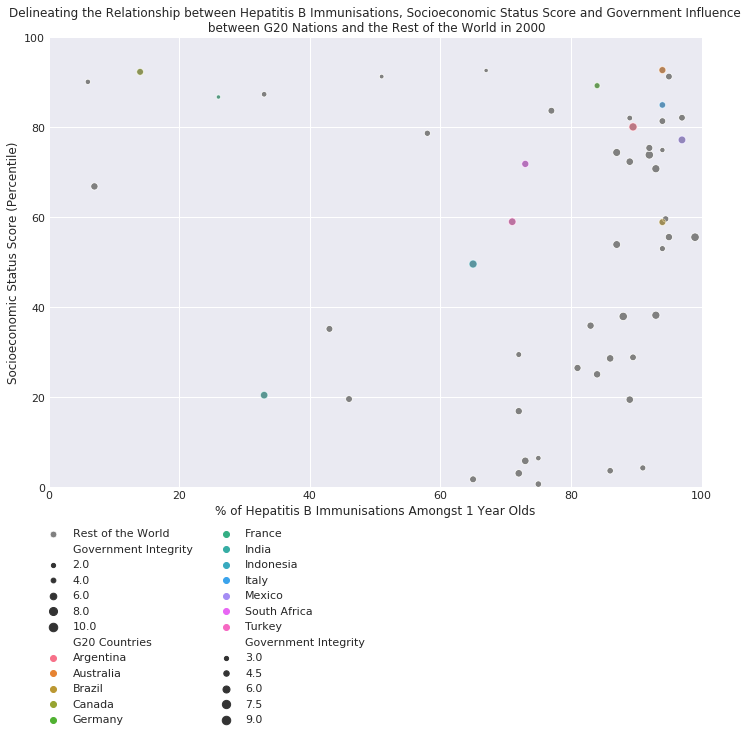

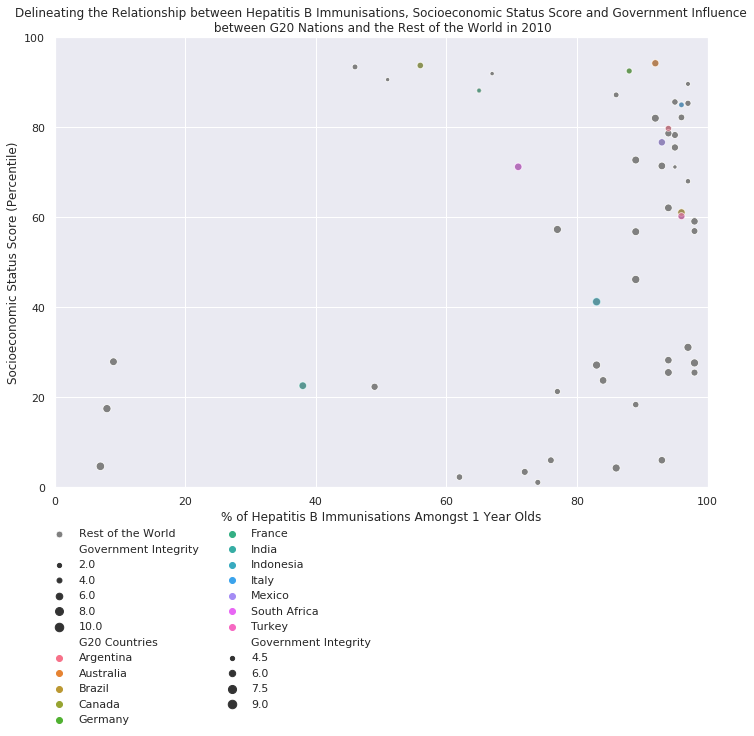

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = gs_le_efw.loc[gs_le_efw['Year']==i]
  df1 = gs_le_efw_g20.loc[gs_le_efw_g20['Year']==i]
  df1.rename(columns={'Country': 'G20 Countries', '1_size_government': 'Government Integrity'}, inplace=True)
  df.rename(columns={'1_size_government': 'Government Integrity'}, inplace=True)
  sns.scatterplot(df['Hepatitis B'], df['SES'], color = 'grey', label = 'Rest of the World', size = 'Government Integrity', data = df, marker='o', ax=ax)
  #num1 = 2
  g20_plot = sns.scatterplot(df1['Hepatitis B'], df1['SES'], size = 'Government Integrity', data = df1, alpha = 0.5, hue = 'G20 Countries', marker='o', ax=ax)
  g20_plot
  #sns.set(rc={'figure.figsize':(11.7,8.27)})
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=2)
  plt.xlabel('% of Hepatitis B Immunisations Amongst 1 Year Olds')
  plt.ylabel('Socioeconomic Status Score (Percentile)')
  plt.ylim(0,100)
  plt.xlim(0,100)
  plt.title('Delineating the Relationship between Hepatitis B Immunisations, Socioeconomic Status Score and Government Influence\n between G20 Nations and the Rest of the World in ' + str(i))
  plt.savefig('Delineating the Relationship between Hepatitis B Immunisations, Socioeconomic Status Score and Government Influence\n between G20 Nations and the Rest of the World in ' + str(i), bbox_inches='tight')
  plt.show()

Similarly, this same new process was utilised amongst the rest of the scatter plots only changing the data frames values for different measure comparisons, while limits were also adjusted to ensure no inaccuracies arose. The code and graphs are as follows:

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


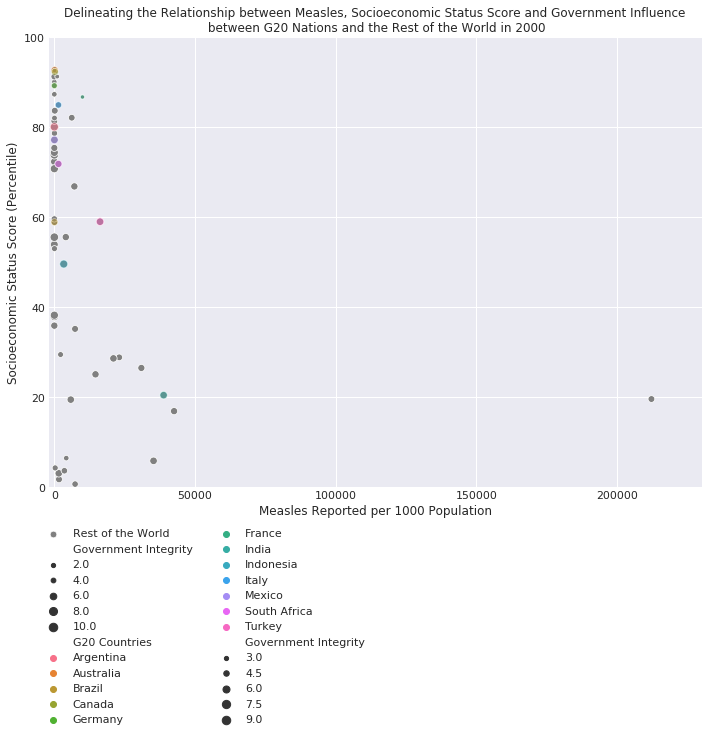

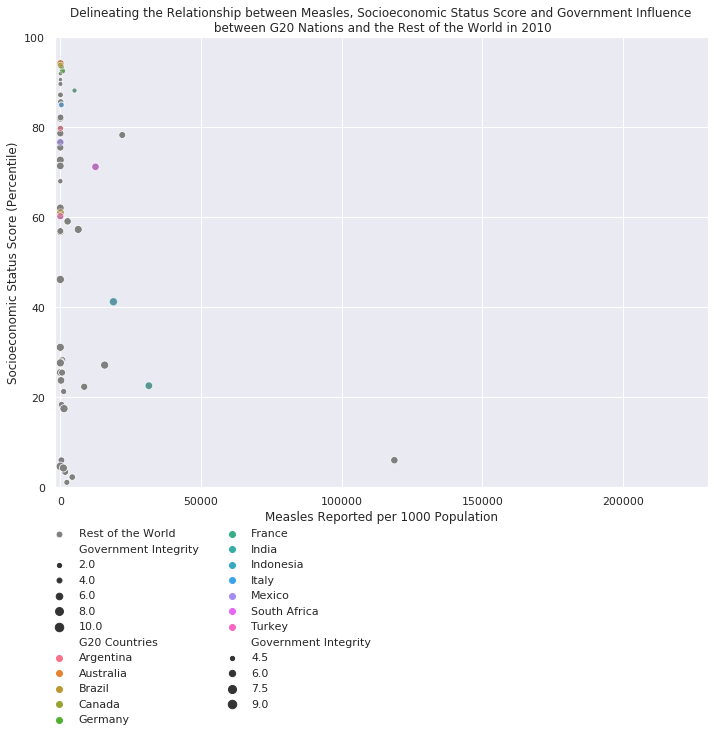

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = gs_le_efw.loc[gs_le_efw['Year']==i]
  df1 = gs_le_efw_g20.loc[gs_le_efw_g20['Year']==i]
  df1.rename(columns={'Country': 'G20 Countries', '1_size_government': 'Government Integrity'}, inplace=True)
  df.rename(columns={'1_size_government': 'Government Integrity'}, inplace=True)
  sns.scatterplot(df['Measles'], df['SES'], color = 'grey', label = 'Rest of the World', size = 'Government Integrity', data = df, marker='o', ax=ax)
  #num1 = 2
  g20_plot = sns.scatterplot(df1['Measles'], df1['SES'], size = 'Government Integrity', data = df1, alpha = 0.5, hue = 'G20 Countries', marker='o', ax=ax)
  g20_plot
  #sns.set(rc={'figure.figsize':(11.7,8.27)})
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=2)
  plt.xlabel('Measles Reported per 1000 Population')
  plt.ylabel('Socioeconomic Status Score (Percentile)')
  plt.ylim(0,100)
  plt.xlim(-2000,230000)
  plt.title('Delineating the Relationship between Measles, Socioeconomic Status Score and Government Influence\n between G20 Nations and the Rest of the World in ' + str(i))
  plt.savefig('Delineating the Relationship between Measles Immunisations, Socioeconomic Status Score and Government Influence in ' + str(i))
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


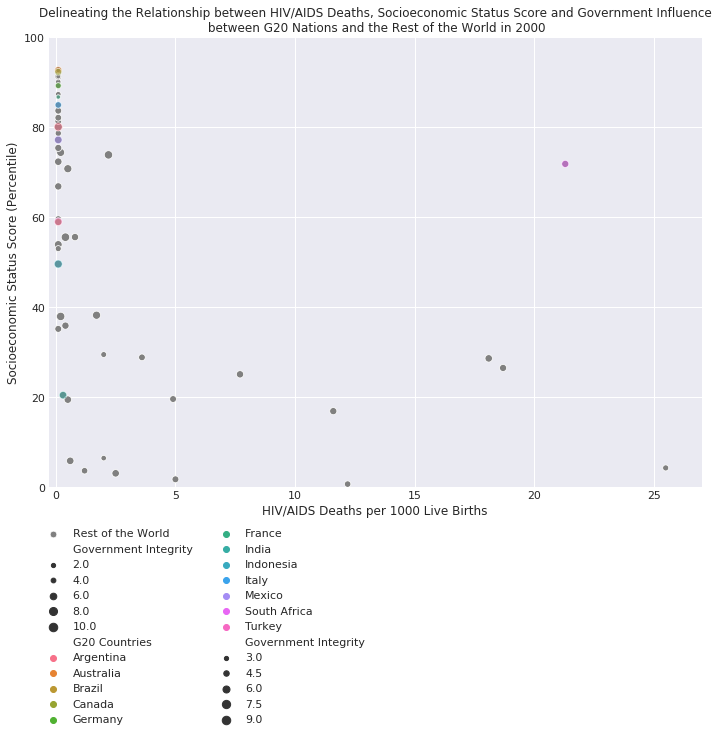

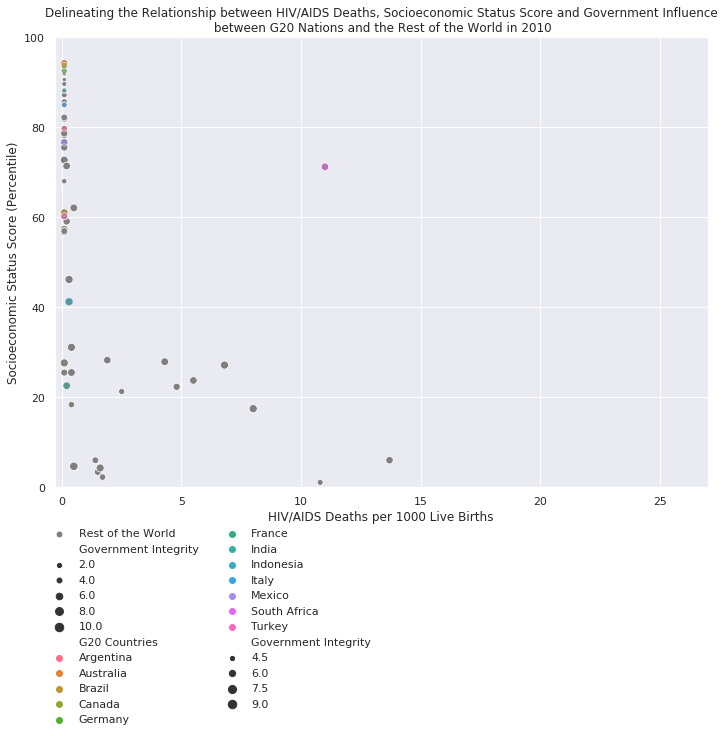

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = gs_le_efw.loc[gs_le_efw['Year']==i]
  df1 = gs_le_efw_g20.loc[gs_le_efw_g20['Year']==i]
  df1.rename(columns={'Country': 'G20 Countries', '1_size_government': 'Government Integrity'}, inplace=True)
  df.rename(columns={'1_size_government': 'Government Integrity'}, inplace=True)
  sns.scatterplot(df['HIV/AIDS'], df['SES'], color = 'grey', label = 'Rest of the World', size = 'Government Integrity', data = df, marker='o', ax=ax)
  #num1 = 2
  g20_plot = sns.scatterplot(df1['HIV/AIDS'], df1['SES'], size = 'Government Integrity', data = df1, alpha = 0.5, hue = 'G20 Countries', marker='o', ax=ax)
  g20_plot
  #sns.set(rc={'figure.figsize':(11.7,8.27)})
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=2)
  plt.xlabel('HIV/AIDS Deaths per 1000 Live Births')
  plt.ylabel('Socioeconomic Status Score (Percentile)')
  plt.ylim(0,100)
  plt.xlim(-0.3,27)
  plt.title('Delineating the Relationship between HIV/AIDS Deaths, Socioeconomic Status Score and Government Influence\n between G20 Nations and the Rest of the World in ' + str(i))
  plt.savefig('thing1' + str(i)+'.png')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


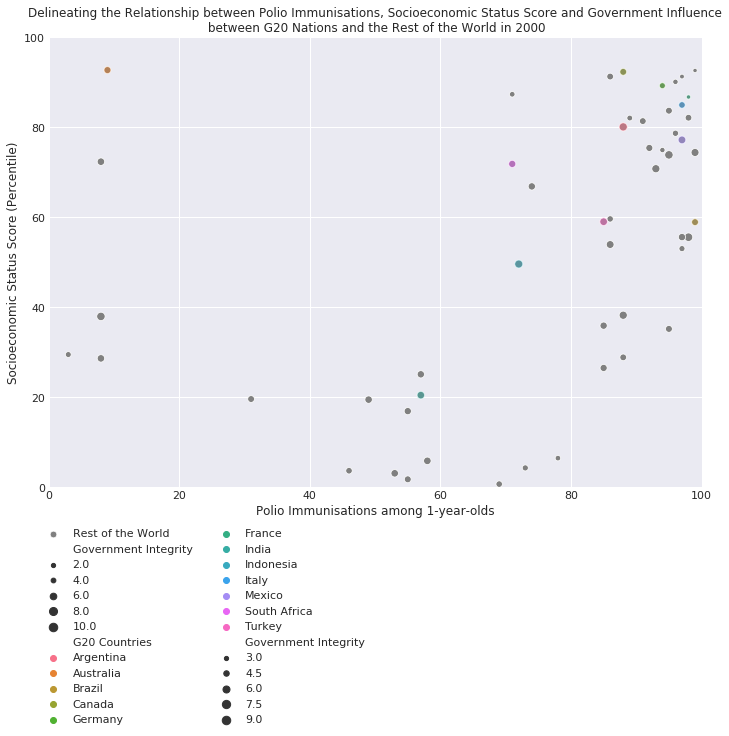

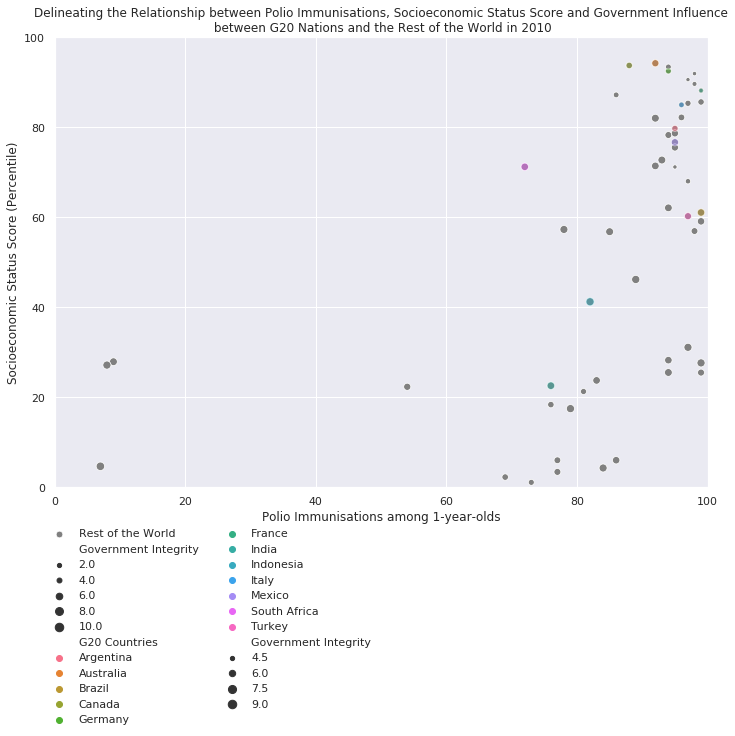

In [0]:
years_adj = [2000, 2010] 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
num=0
for i in years_adj:
  num+=1
  fig, ax = plt.subplots()
  #plt.figure(figsize = (24, 10))
  #plt.subplot(5, 1, num)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  i = int(i)
  df = gs_le_efw.loc[gs_le_efw['Year']==i]
  df1 = gs_le_efw_g20.loc[gs_le_efw_g20['Year']==i]
  df1.rename(columns={'Country': 'G20 Countries', '1_size_government': 'Government Integrity'}, inplace=True)
  df.rename(columns={'1_size_government': 'Government Integrity'}, inplace=True)
  sns.scatterplot(df['Polio'], df['SES'], color = 'grey', label = 'Rest of the World', size = 'Government Integrity', data = df, marker='o', ax=ax)
  #num1 = 2
  g20_plot = sns.scatterplot(df1['Polio'], df1['SES'], size = 'Government Integrity', data = df1, alpha = 0.5, hue = 'G20 Countries', marker='o', ax=ax)
  g20_plot
  #sns.set(rc={'figure.figsize':(11.7,8.27)})
  handles, labels = ax.get_legend_handles_labels()
  plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=2)
  plt.xlabel('Polio Immunisations among 1-year-olds')
  plt.ylabel('Socioeconomic Status Score (Percentile)')
  plt.ylim(0,100)
  plt.xlim(0,100)
  plt.title('Delineating the Relationship between Polio Immunisations, Socioeconomic Status Score and Government Influence\n between G20 Nations and the Rest of the World in ' + str(i))
  plt.savefig('thing2' + str(i)+'.png')
  plt.show()

## Machine Learning Applications

Furthering our understanding as gained from the creation and analysis of graphical elements, the development of predictive machine learning models was incorporated. This section will detail the methodologies involved to produce them and is primarily intended for providing insights to individuals with an interest in IT approaches to data analysis.

Initial preparation and direction was critical to positing the intended aim to be achieved with such machine learning tools. This involved a careful consideration of relationships depicted in the graphs created earlier. Having been convinced by the strong correlation posed between Years of Education and Life Expectancy, the decision was made to produce a linear regression model that uses input variables GDP per Capita and years of education to predict life expectancy.

Following the decision, an acknowledgement to recognising the potential of predicting a country’s developing or developed status was realised. While there was the possibility to include a model that considered the prediction of this target variable with account of all measures from all three datasets this would extremely limit the data. This is due to the inconsistencies between datasets that causes particular rows to drop by the pd.merge function due to misalignment. Thus, the choice to delineate country status predictions was made with measures from the socioeconomic and life expectancy data set. Through a binary target variable approach, this was best achieved through applying a logistic regression model.
Delving into the methodologies, the relevant packages were first imported.

In [0]:
#Importing all the relevant packages
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [0]:
yrseduc_le.head(6)

unid wbid    Country  Year        SES       gdppc  yrseduc  popshare      Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS           GDP  Population  thinness 1-19 years  thinness 5-9 years  Income composition of resources  Schooling
0    24  AGO     Angola  2010  21.247763   6492.1768   2.7900  0.003149  Developing             49.6            365.0             78     7.80              191.653741         77.0     1190   2.4                121   81.0               3.39        77.0       2.5   3529.534820  23369131.0                  9.1                 9.0                            0.488        9.0
1    24  AGO     Angola  2000  29.470123   3831.0000   2.2800  0.002529  Developing             45.3             48.0             97     1.85               15.881493         72.0     2219  15.4                160    3.0               2.79        28.0       2.0    555.296942   1644924.0                  1.9                 1.9                            0.382        4.6
2    32  ARG  Argentina  2010  79.750809  18794.2700   9.3458  0.006118  Developing             75.5            121.0             10     8.15              187.610955         94.0       17  59.8                 11   95.0               6.55        94.0       0.1   1276.265000  41223889.0                  1.0                 0.9                            0.802       16.8
3    32  ARG  Argentina  2000  80.109383  14924.3740   8.7262  0.006224  Developing             74.1            137.0             12     7.68             1349.025282         89.5        6  54.0                 14   88.0               9.21        83.0       0.1   7669.273916   3757452.0                  1.2                 1.1                            0.764       15.0
4    36  AUS  Australia  2000  92.742691  35244.5040  11.7711  0.003217   Developed             79.5             78.0              1    10.17              347.187360         94.0      108  58.2                  2    9.0               8.80         9.0       0.1   2169.921000     19153.0                  0.7                 0.7                            0.897       20.4
5    36  AUS  Australia  2010  94.268761  41363.2150  12.1186  0.003270   Developed             81.9             64.0              1    10.52             8875.786493         92.0       70  63.9                  1   92.0               9.20        92.0       0.1  51874.848000    223175.0                  0.7                 0.6                            0.927       19.5

Using the previously created yrseduc_le dataframe this contains all the required measures from both the socioeconomic and life expectancy dataset.

In [0]:
#Linear Regression across all countries using yrseduc_le dataframe
df1 = yrseduc_le.loc[yrseduc_le['Year'] == 2010]
df2 = yrseduc_le.loc[yrseduc_le['Year'] == 2000]

In [0]:
df1.columns

Index(['unid', 'wbid', 'Country', 'Year', 'SES', 'gdppc', 'yrseduc', 'popshare', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

## Using Life expectancy and Socioeconomic Measures to Produce a Logistic Regression Model



### Predicting Life Expectancy from GDPpc and Yrs of Education



Having filtered the dataset with its respect years, the year 2015 was considered as the base year from which the predictions would be made as it is the most recent year available within the dataset. With the data frame, slicing was used to acquire both the input (independent) variables and target (dependent) variables. Effectively, columns in the data frame associated with 5 and 6 were selected, these were GDP per capita and years of education for the input and 9 as the target of which is life expectancy.

In [0]:
# Use only two features
X = df1.values[:, 5:7]
X1 = df1.values[:, 6]
y = df1.values[:, 9] 

Utilising the train_test_split function offered by the pandas library the data was split for training and testing. The test size in this instance was made as 60% of all values.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

The input and target variables having been readied for modelling the linear regression model was prepared.

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression().fit(X_train, y_train)

Therefore, with a linear model produced a sample can be inputted into the model to produce a prediction. For example below the GDP per capita of 40000 and 6 years of education predicted a 79 years life expectancy.

In [0]:
# Let's create one sample and predict the Life expectancy
sample = [40000, 6]        # a sample with a 40000 GDPpc and 6 yrs of education
print('----- Sample case -----')
for column, value in zip(list(df1)[5:7], sample):
    print(column + ': ' + str(value))
sample_pred = regr.predict([sample])
print('Predicted life expectancy:', int(sample_pred))
print('-----------------------')

----- Sample case -----
gdppc: 40000
yrseduc: 6
Predicted life expectancy: 79
-----------------------


In [0]:
# The coefficients
print('Coefficients:')
print(regr.coef_)
# Use the model to predict y from X_test
y_pred = regr.predict(X_test)
# Root mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Root mean squared error (RMSE):', sqrt(mse))
# R-squared score: 1 is perfect prediction
print('R-squared score:', metrics.r2_score(y_test, y_pred))

Coefficients:
[4.16176843e-04 1.32321402e+00]
Root mean squared error (RMSE): 5.22019388698574
R-squared score: 0.7476280359447605


### Predicting Expenditure on Health as a % of GDP per Capita from GDPpc and Yrs of Education (all countries)

In [0]:
le_efw.columns

Index(['Year', 'ISO_code', 'Country', 'ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',


In [0]:
# Use only two features
X = gs_le_efw.values[:, 5:7]
y = gs_le_efw.values[:, 47] 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression().fit(X_train, y_train)

In [0]:
# Let's create one sample and predict the Life expectancy
sample = [2000, 12]        # a sample with a 40000 GDPpc and 6 yrs of education
print('----- Sample case -----')
for column, value in zip(list(df1)[5:7], sample):
    print(column + ': ' + str(value))
sample_pred = regr.predict([sample])
print('Predicted Expenditure on Health as a % of GDP per Capita:', int(sample_pred))
print('-----------------------')

----- Sample case -----
gdppc: 2000
yrseduc: 12
Predicted Expenditure on Health as a % of GDP per Capita: 164
-----------------------


## Building a Logistic Regression Model to Predict if a Country is Developing or is Developed.

Next, some manipulation was required before it would be ready for applying the logistic regression model. An adjusted le_efw data frame was produced excluding all columns that contained strings, except the status column of which was relocated to the end. The year was then filtered for 2010 and the final data frame having its indices reset to its new position and the year column dropped.

In [0]:
le_efw_adjusted = le_efw[['Year', 'ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Status']]
df = le_efw_adjusted.loc[le_efw_adjusted['Year']==2010]
df = df.reset_index(drop=True)
df = df[['ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption', '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence', '2b_impartial_courts', '2c_protection_property_rights', '2d_military_interference', '2e_integrity_legal_system', '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property', '2h_reliability_police', '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights', '3a_money_growth', '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers', '4c_black_market', '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg', '5_regulation', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Status']]

In [0]:
df.head(6)

Country  ECONOMIC FREEDOM   rank  quartile  1a_government_consumption  1b_transfers  1c_gov_enterprises  1d_top_marg_tax_rate  1_size_government  2a_judicial_independence  2b_impartial_courts  2c_protection_property_rights  2d_military_interference  2e_integrity_legal_system  2f_legal_enforcement_contracts  2g_restrictions_sale_real_property  2h_reliability_police  2i_business_costs_crime  2j_gender_adjustment  2_property_rights  3a_money_growth  3b_std_inflation  3c_inflation  3d_freedom_own_foreign_currency  3_sound_money  4a_tariffs  4b_regulatory_trade_barriers  4c_black_market  4d_control_movement_capital_ppl   4_trade  5a_credit_market_reg  5b_labor_market_reg  5c_business_reg  5_regulation  Life expectancy  Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS           GDP  Population  thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0    Albania              7.35   38.0       1.0                   8.088235      7.386921                 7.0                   8.5           7.743789                  3.290798             4.512965                       4.046221                  8.333333                   4.166667                        5.356253                            5.464661               5.856044                 7.168332              0.962963           5.255863         9.857487          9.753057      9.289547                             10.0       9.725022    8.450743                      6.861612         10.00000                         3.675338  7.246924              7.038539             7.138579         6.196806      6.791308             76.2             91.0              1     5.28               41.822757         99.0       10  54.3                  1   99.0               5.34        99.0       0.1    494.358832    291321.0                  1.4                 1.5                            0.725   
1    Algeria              5.07  147.0       4.0                   1.941176      8.190275                 0.0                   4.5           3.377151                  2.536098             3.275370                       3.469971                  5.000000                   5.000000                        4.386016                            6.758987               4.563257                 4.937038              0.730769           3.839109         8.349199          6.132010      9.217391                              5.0       7.174650    6.908444                      5.890271          8.56554                         1.791064  5.788830              5.666667             4.994376         4.808358      5.156467             74.7            119.0             21     0.45              430.717586         95.0      103  53.9                 24   95.0               5.12        95.0       0.1   4463.394675  36117637.0                  5.9                 5.8                            0.714   
2     Angola              5.30  145.0       4.0                   3.911765      7.962742                 0.0                   9.5           5.343627                  2.363230             2.506430                       2.853713                  3.333333                   5.000000                        2.302200                            5.470664               4.225102                 5.624981              0.962963           3.672884         5.117563          5.057451      7.105892                              5.0       5.570226    8.237022                      4.019068         10.00000                         2.503233  6.189831              8.666667             4.007036         4.469293      5.714332             49.6            365.0             78     7.80              191.653741         77.0     1190   2.4                121   81.0               3.39        77.0       2.5   3529.534820  23369131.0                  9.1                 9.0                            0.488   
3  Argentina              5.59  139.0    

In [0]:
'''
countries_new = []
for i in range(0,62):
  a = df.Country.unique()[i]
  b = a, 'INDEX:', i
  countries_new.append(b)
'''

Utilising the shape method the independent and dependent variables was sliced respectively where all measures except the last column were included as inputs. The last column was selected as the target. Similarly to above, the train_test_split function was applied of which again 60% of the data was selected for testing.

The LogisticRegression object was finally created where it uses the liblinear solver. It is essentially a large-linear classification model that supports logistic regression and linear support vector machines.

In [0]:
#Building the Model
[num_row, num_var] = df.shape
X = df.values[:, 0:num_var - 1]      # slice dataFrame to extract input variables
y = df.values[:, num_var - 1]        # slice dataFrame to extract target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = linear_model.LogisticRegression(solver='liblinear').fit(X_train, y_train)

Retrieving such a model classification of the test data can be achieved, wherein the predict method is called. This allows a derivation of the probability that a country’s variables may imply it being developed or developing; attained by the predict_proba method.

Finally a sample was selected from the test data, this being the last row. While the for loop produces each variable and its value the probabilities of each class status is displayed. The actual status is included below.

In [0]:
_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
# Let's get one sample and predict the probabilities
print('----- Sample case -----')
last_sample = X_test[-1]
for column, value in zip(list(df), last_sample):
    print(column + ': ' + str(value))
last_sample_proba = y_pred_proba[-1]
print('Probability of class Developed:', last_sample_proba[0])
print('Probability of class Developing:', last_sample_proba[1])
print('Actual class:', str(y_test[-1]))
print('-----------------------')

print('Calculate the accuracy using the test data')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

----- Sample case -----
ECONOMIC FREEDOM: 7.22
rank: 52.0
quartile: 2.0
1a_government_consumption: 6.705882353
1b_transfers: 8.555858311
1c_gov_enterprises: 6.0
1d_top_marg_tax_rate: 6.0
1_size_government: 6.815435166
2a_judicial_independence: 1.848050606
2b_impartial_courts: 4.111011333
2c_protection_property_rights: 6.252152159
2d_military_interference: 8.333333332999999
2e_integrity_legal_system: 5.0
2f_legal_enforcement_contracts: 2.25658445
2g_restrictions_sale_real_property: 7.653054843
2h_reliability_police: 5.638990452000001
2i_business_costs_crime: 4.482692988
2j_gender_adjustment: 0.962962963
2_property_rights: 4.970208063
3a_money_growth: 8.287965518
3b_std_inflation: 8.919908286
3c_inflation: 9.301742255
3d_freedom_own_foreign_currency: 10.0
3_sound_money: 9.127404015
4a_tariffs: 7.878248317000001
4b_regulatory_trade_barriers: 7.577731788999999
4c_black_market: 10.0
4d_control_movement_capital_ppl: 7.690765802
4_trade: 8.286686477
5a_credit_market_reg: 9.17987988
5b_labor_m